In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import networkx as nx
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('../')


execfile( "load_antibiotics.py" )
from build_sample_graph import *
from build_TP_corr_graph import *

done otu
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['ind', 'condition', 'time']


In [2]:
sample_names=otu.columns.values
index_E=[e for e in sample_names if e[0]=="E"]
index_F=[e for e in sample_names  if e[0]=="F"]
index_D=[e for e in sample_names  if e[0]=="D"]

states=[u for u in np.unique(sample.loc[:,"condition"])]
colors=["maroon","indianred", "orange","gold","lightgreen","mediumseagreen", "royalblue"]
color={states[i]:colors[i] for i in range(len(colors))}
evol_distance_E=np.zeros(len(index_E)-1)
colors_evol_E={e:color[sample.loc[e,"condition"]] for e in index_E }
ordered_color_E=[]
for e in range(1,len(index_E)):
    e1="E"+str(e)
    e2="E"+str(e+1)
    ordered_color_E.append(colors_evol_E[e1])
    #evol_distance_E[e-1]= chi_distance_aligned_graph([n for n in Graphs_sel[e1].index],[n for n in Graphs_sel[e2].index],chi[e1],chi[e2],nb_t=len(taus))




In [84]:
for k in G.keys():
    np.savetxt('/Users/cdonnat/Dropbox/Distances/distances/graph'+k+'_dual.txt',[['Source','Target','Weight']]+[[i,j,G[k].iloc[i,j]] for i in range(1,9) for j in range(i)],\
              fmt='%s %s %s')
    np.savetxt('/Users/cdonnat/Dropbox/Distances/distances/nodes_'+k+'_dual.txt',[['Id','Label']]+[[i,G[k].keys()[i][0]+G[k].keys()[i][-1]] for i in range(9)],fmt='%s %s')
    

In [4]:
G={}
for s in np.unique(states):
    G[s]=pd.DataFrame.from_csv('/Users/cdonnat/Dropbox/Distances/distances/final_dist/dual_graph'+s+'.csv',header=0,index_col=0,sep=' ')
    #plt.figure()
    #sb.heatmap(G[s])
    #alg='dual_graph'+s
    #plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plots/heatmap_'+alg+'.pdf',bbox_inches='tight')
    

In [5]:
states=np.unique(sample.condition)

In [115]:
Distances=pd.DataFrame.from_csv('/Users/cdonnat/Dropbox/Distances/distances/graphs_results_microbiome/jaccard_microbiome_dual.csv',header=0,index_col=0)

In [116]:
#Distances=1-Distances
#np.fill_diagonal(Distances.values,0)

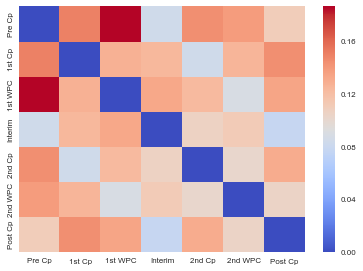

In [117]:
#alg='hamming_from_dual'
alg='jaccard_from_dual'
#alg='jaccard'
#alg='_treat_from_spearman_cor2'
plt.figure()
sb.heatmap(Distances,cmap='coolwarm')
#plt.title('Heatmap: Hamming distance')
plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/FIG/heatmap_'+alg+'.pdf',bbox_inches='tight')


In [76]:
index_e=[e for e in Distances.index.values if e[0]=='E']
index_f=[e for e in Distances.index.values if e[0]=='F']
index_d=[e for e in Distances.index.values if e[0]=='D']

In [77]:
states=list(np.unique(sample.condition))

In [90]:
index_d=[ 'Pre Cp','1st Cp', '1st WPC','Interim', '2nd Cp', '2nd WPC',  'Post Cp']

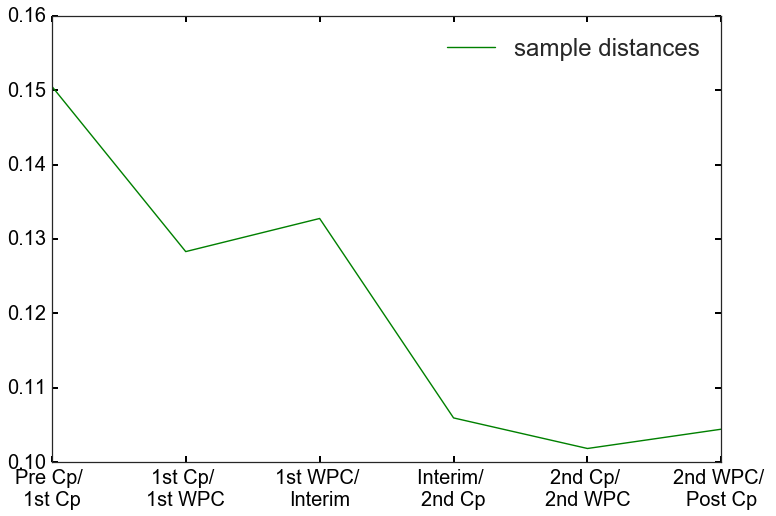

In [95]:
sb.set()
sb.set(font_scale=1.5)
sb.set_style("white")
sb.set_context('paper')
fig,ax=plt.subplots(figsize=(12,8))
#sb.set_context('paper')
plt.plot([Distances.loc[index_d[i],index_d[i+1]] for i in range(len(index_d)-1)],color='green',label='sample distances')
ax.set_xticklabels([index_d[i]+'/ \n'+index_d[i+1] for i in range(6)])
ax.tick_params(axis='x',labelsize=20, direction='in', length=6, width=2, colors='black')
ax.tick_params(axis='y',labelsize=20, direction='in', length=6, width=2, colors='black')
plt.legend(loc='upper right',fontsize=24)
#plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/FIG/consecutive_dist_microbiome_'+alg+'.pdf',bbox_inches='tight')
#ax.xaxis.set_major_formatter(AutoLocator())

In [80]:
states=['Pre Cp','1st Cp', '1st WPC','Interim',  '2nd Cp', '2nd WPC', 'Post Cp']

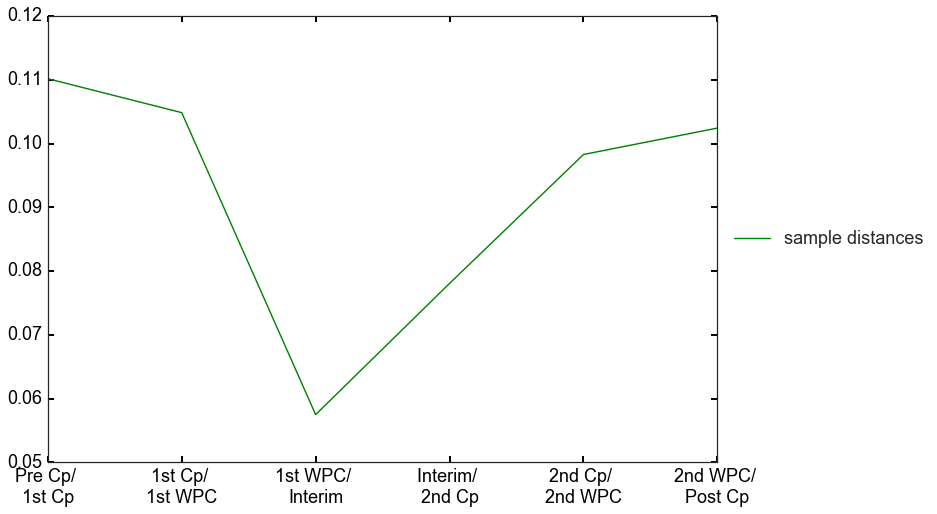

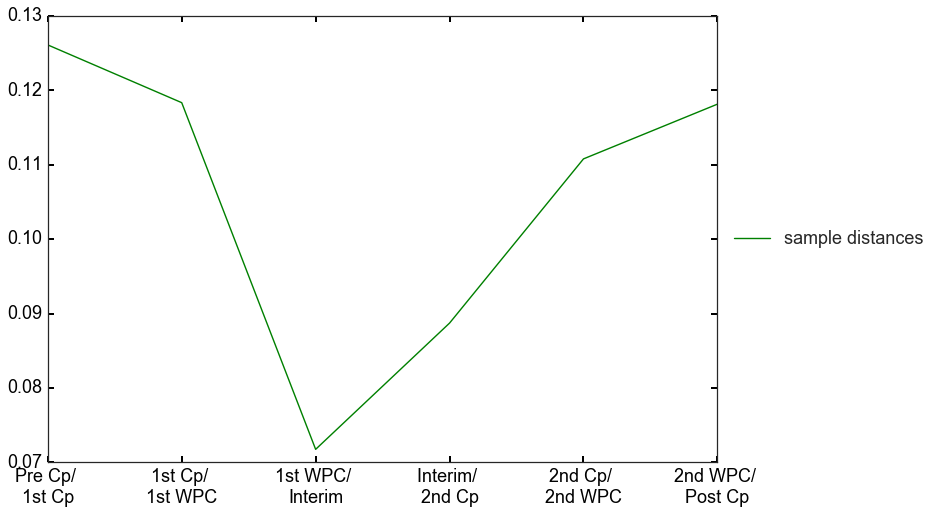

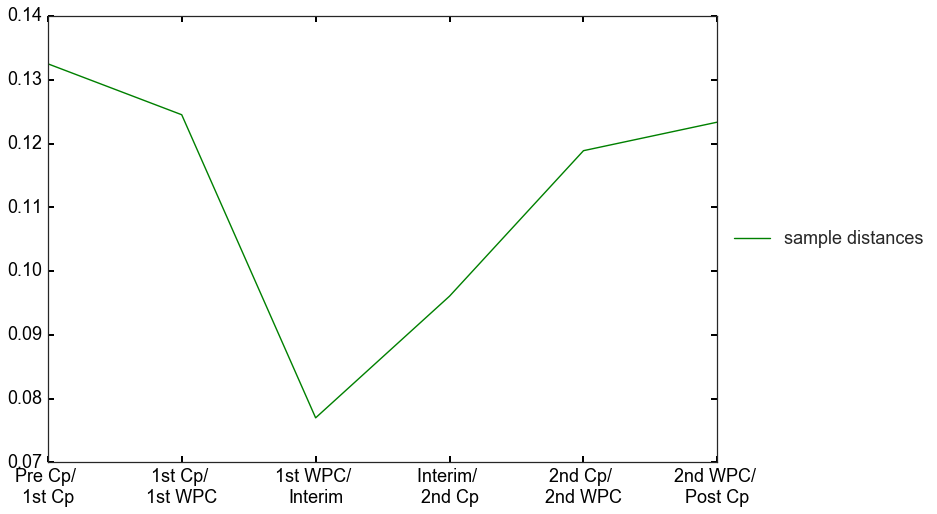

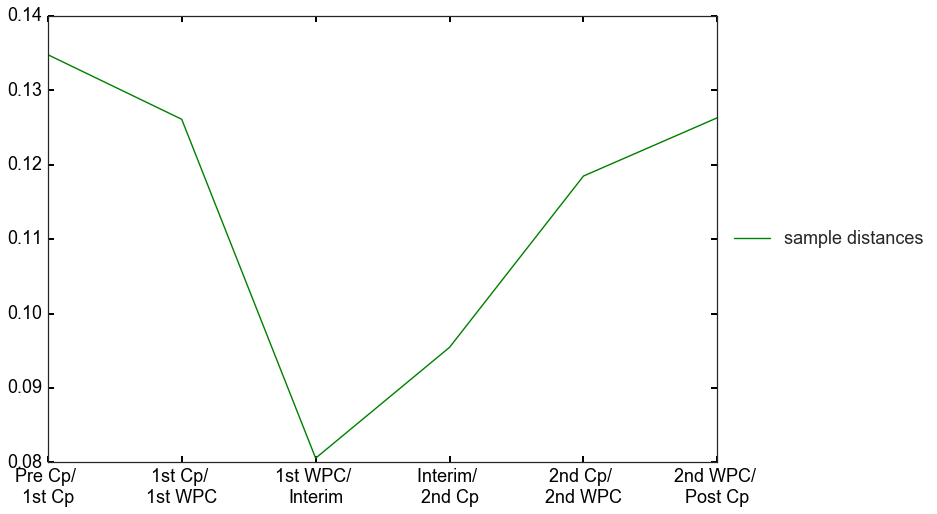

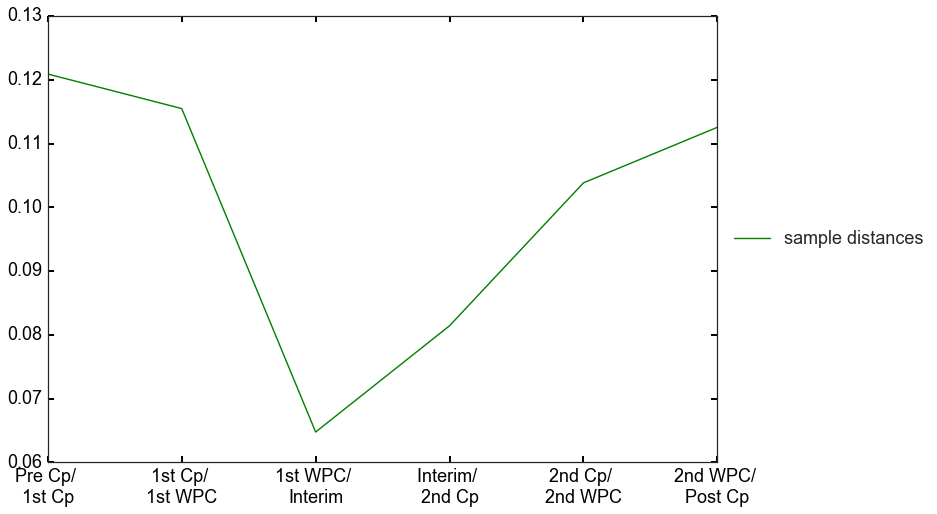

In [66]:
for tau in taus:
    alg='heat_from_dual_'+str(tau)
    sb.set()
    sb.set(font_scale=1.5)
    sb.set_style("white")
    sb.set_context('paper')
    fig,ax=plt.subplots(figsize=(12,8))
    #sb.set_context('paper')
    plt.plot([D[tau].loc[index_d[i],index_d[i+1]] for i in range(len(index_d)-1)],color='green',label='sample distances')
    ax.set_xticklabels([index_d[i]+'/ \n'+index_d[i+1] for i in range(6)])
    ax.tick_params(axis='x',labelsize=18, direction='in', length=6, width=2, colors='black')
    ax.tick_params(axis='y',labelsize=18, direction='in', length=6, width=2, colors='black')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=18)
    #plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/FIG/consecutive_dist_microbiome_'+alg+'.pdf',bbox_inches='tight')
    #ax.xaxis.set_major_formatter(AutoLocator())

In [62]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
J=np.diag([1]*Distances.shape[0])-1.0/Distances.shape[0]*np.ones(Distances.shape)
pca.fit(0.5*J.dot((Distances**2).dot(J)))

pca.explained_variance_ratio_


eigenval=np.linalg.eigvals(0.5*J.dot((Distances**2).dot(J)))

eigenval=np.sort(np.abs(np.real(eigenval)))

In [63]:
eigenval

array([  2.04171854e-18,   5.82466039e-04,   3.09264147e-03,
         3.62666714e-03,   4.53048919e-03,   1.23910947e-02,
         2.14791205e-02])

Pre Cp
1st Cp
1st WPC
Interim
2nd Cp
2nd WPC
Post Cp


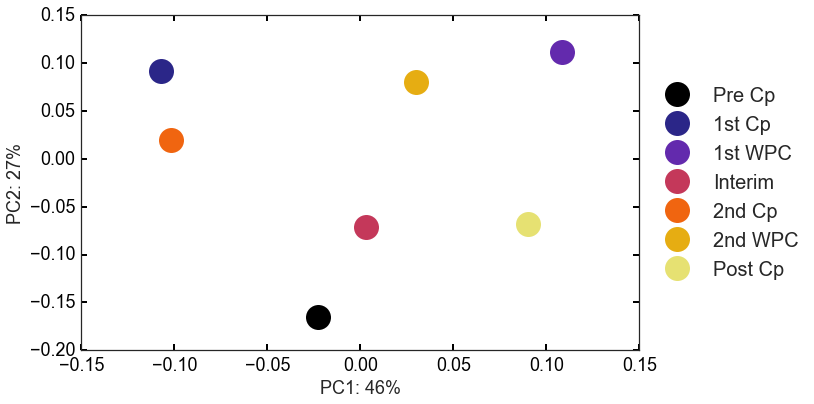

In [68]:
import sklearn as sk
from sklearn.manifold import MDS
tsne = MDS(n_components=2, dissimilarity='precomputed')


fig,ax=plt.subplots(figsize=(10,6))
it_s=0
shape_people={'E':'o','F':'d','D':'p'}
cmap=plt.get_cmap('CMRmap')
x=np.linspace(0,1,8)
mds=MDS(2,metric='precomputed')
Y_tsne=mds.fit_transform(Distances)
colors_plot_states={states[i]:cmap(x[i]) for i in range(7)}
for st in states:
    print(st)
    ind_ss=it_s
    plt.plot(Y_tsne[ind_ss,0], Y_tsne[ind_ss,1],c=colors_plot_states[st],marker='o',label=st, markersize=25,linestyle='None')
    it_s+=1
        #plt.scatter(Y_tsne[ind_s,0], Y_tsne[ind_s,1],color=colors_plot_states[st],label=st,marker=shape_people[p],linestyle='None', markersize=15)
ax.tick_params(axis='x',labelsize=18, direction='in', length=6, width=2, colors='black')
ax.tick_params(axis='y',labelsize=18, direction='in', length=6, width=2, colors='black')
plt.xlabel(r'PC1: '+str(int(100*eigenval[-1]/np.sum(eigenval*(eigenval>0))))+'%',fontsize=18)
plt.ylabel(r'PC2: '+str(int(100*eigenval[-2]/np.sum(eigenval*(eigenval>0))))+'%',fontsize=18)
        
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=20)            
plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/FIG/mds_TP_microbiome_'+alg+'.pdf',bbox_inches='tight')

            

In [47]:
alg


'jaccard_from_dual'

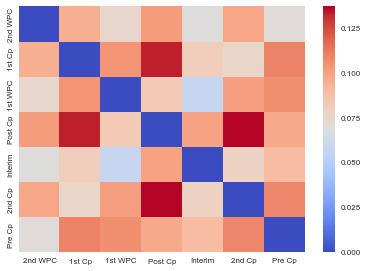

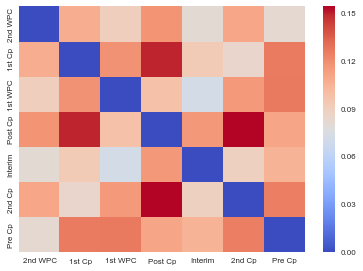

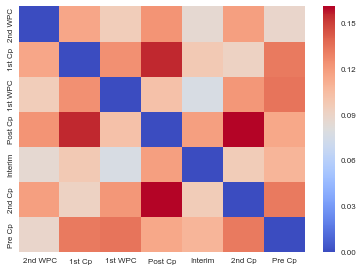

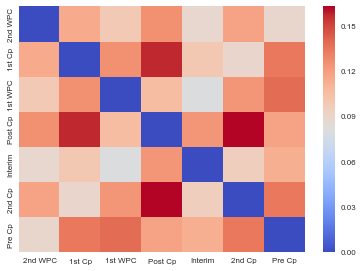

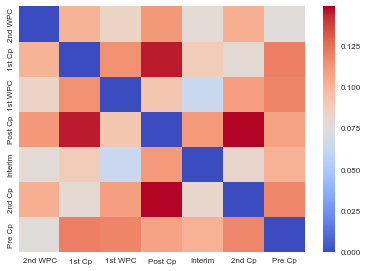

In [61]:

for tau in taus:
    alg='heat_from_dual_'+str(tau)
    #alg='jaccard_from_vegan'
    #alg='jaccard'
    #alg='_treat_from_spearman_cor2'
    plt.figure()
    sb.heatmap(D[tau],cmap='coolwarm')
    #plt.title('Heatmap: Hamming distance')
    plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plots/heatmap_'+alg+'.pdf',bbox_inches='tight')



In [17]:
import sklearn as sk
from sklearn.manifold import MDS
tsne = MDS(n_components=2, metric='precomputed')
Y = tsne.fit_transform(Distances.values)

/Users/cdonnat/anaconda/lib/python2.7/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [20]:
colors_people=np.zeros(162)
colors_states=np.zeros(162)
colors_people[[np.where(e==Distances.index)[0][0] for e in index_e]]=1
colors_people[[np.where(e==Distances.index)[0][0] for e in index_f]]=2
it_s=0
for s in states:
    colors_states[list(np.where([d==s for d in sample.condition.values])[0])]=it_s
    it_s+=1

In [54]:
n=len(chi)
D={tau:pd.DataFrame(np.zeros((n,n)),index=chi.keys(),columns=chi.keys()) for tau in taus}
for tau in taus:
    for ii in range(1,n):
        print ii
        i=chi.keys()[ii]
        for jj in range(ii):
            print jj
            j=chi.keys()[jj]
            c1=pd.DataFrame(chi[i][tau],  index=[e[0]+e[-1] for e in G[chi.keys()[ii]].index.values])
            c2=pd.DataFrame(chi[j][tau], index=[e[0]+e[-1] for e in G[chi.keys()[jj]].index.values])
            D[tau].loc[i,j]=np.sqrt(1.0/(9*100)*((c1-c2).applymap(lambda x: x**2)).sum().sum())
   
    D[tau]=D[tau]+D[tau].T
    np.save("D_corr_agg_new_series_tests__jaccard_graph.npy",D)

1
0
2
0
1
3
0
1
2
4
0
1
2
3
5
0
1
2
3
4
6
0
1
2
3
4
5
1
0
2
0
1
3
0
1
2
4
0
1
2
3
5
0
1
2
3
4
6
0
1
2
3
4
5
1
0
2
0
1
3
0
1
2
4
0
1
2
3
5
0
1
2
3
4
6
0
1
2
3
4
5
1
0
2
0
1
3
0
1
2
4
0
1
2
3
5
0
1
2
3
4
6
0
1
2
3
4
5
1
0
2
0
1
3
0
1
2
4
0
1
2
3
5
0
1
2
3
4
6
0
1
2
3
4
5


(array([  21.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    2.,   34.,   46.,
         168.,  170.]),
 array([ 0.        ,  0.04704206,  0.09408411,  0.14112617,  0.18816822,
         0.23521028,  0.28225233,  0.32929439,  0.37633645,  0.4233785 ,
         0.47042056,  0.51746261,  0.56450467,  0.61154673,  0.65858878,
         0.70563084,  0.75267289,  0.79971495,  0.846757  ,  0.89379906,
         0.94084112]),
 <a list of 20 Patch objects>)

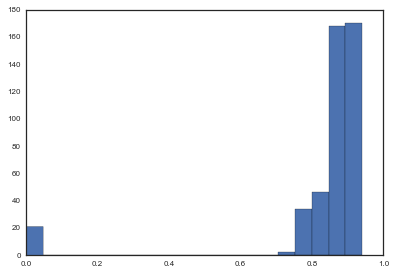

In [151]:
plt.hist(Distances.values.reshape([-1,1]),bins=20)

In [41]:
chi={}
for k in heat_print.keys():
    chi[k]={}
    for it_tau in range(len(taus)):
        chi[k][taus[it_tau]]=featurize_characteristic_function_selected_mode(heat_print[k],it_tau,t=range(0,100,2))
        

In [39]:
heat_print={}
taus=[0.5,0.7,0.9]+range(1,3)
for k in G.keys():
    print k
    heat_print[k]=heat_diffusion(nx.from_numpy_matrix(G[k].values),taus=taus,type_graph="nx")

2017-10-28 19:12:34,067:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-10-28 19:12:34,222:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,233:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,243:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,257:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,272:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby


2nd WPC


2017-10-28 19:12:34,284:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,296:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,310:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,325:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,352:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-10-28 19:12:34,358:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,372:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,385:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,398:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,412:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,427:[INFO](pygsp.filters.filter.analysis): The analysis method

1st Cp
1st WPC


2017-10-28 19:12:34,569:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,582:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,594:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,610:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,638:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-10-28 19:12:34,644:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,657:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,666:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,693:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,712:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,733:[INFO](pygsp.filters.filter.analysis): The analysis method

Post Cp
Interim


2017-10-28 19:12:34,853:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,866:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,877:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,890:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,904:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,912:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,938:[INFO](pygsp.filters.filter.__init__): Heat : has to compute lmax
2017-10-28 19:12:34,942:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,952:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,965:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:34,983:[INFO](pygsp.filters.filter.analysis): The analysis method

2nd Cp
Pre Cp


2017-10-28 19:12:35,149:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:35,167:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:35,187:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby
2017-10-28 19:12:35,196:[INFO](pygsp.filters.filter.analysis): The analysis method is cheby


In [127]:
Distances

DPre Cp   D1st Cp  D1st WPC  DInterim   D2nd Cp  D2nd WPC  \
DPre Cp   0.000000  0.101946  0.094147  0.071545  0.101317  0.093263   
D1st Cp   0.101946  0.000000  0.123586  0.088330  0.140716  0.129668   
D1st WPC  0.094147  0.123586  0.000000  0.080960  0.124912  0.111445   
DInterim  0.071545  0.088330  0.080960  0.000000  0.085176  0.077772   
D2nd Cp   0.101317  0.140716  0.124912  0.085176  0.000000  0.126648   
D2nd WPC  0.093263  0.129668  0.111445  0.077772  0.126648  0.000000   
DPost Cp  0.105226  0.142993  0.127395  0.090216  0.144669  0.128337   
EPre Cp   0.089403  0.104779  0.097640  0.081594  0.103981  0.095536   
E1st Cp   0.113787  0.140448  0.130464  0.102696  0.138834  0.131915   
E1st WPC  0.107862  0.141303  0.129150  0.093870  0.140955  0.130606   
EInterim  0.071628  0.082148  0.076885  0.064662  0.081505  0.072212   
E2nd Cp   0.108990  0.139013  0.126903  0.096515  0.139840  0.128489   
E2nd WPC  0.099909  0.132109  0.117546  0.085470  0.129065  0.112090   
EPost Cp  0.111527  0.137470  0.128266  0.099276  0.139338  0.128879   
FPre Cp   0.085869  0.105954  0.095385  0.076029  0.107843  0.091889   
F1st Cp   0.102075  0.137446  0.122185  0.087305  0.139537  0.119600   
F1st WPC  0.094902  0.134022  0.116030  0.078472  0.134711  0.105598   
FInterim  0.074974  0.090062  0.081598  0.065576  0.088147  0.072742   
F2nd Cp   0.104365  0.141621  0.123093  0.089561  0.141392  0.122744   
F2nd WPC  0.095825  0.127653  0.114064  0.082403  0.127192  0.107599   
FPost Cp  0.107721  0.150295  0.130832  0.090381  0.155112  0.128951   

          DPost Cp   EPre Cp   E1st Cp  E1st WPC    ...      E2nd Cp  \
DPre Cp   0.105226  0.089403  0.113787  0.107862    ...     0.108990   
D1st Cp   0.142993  0.104779  0.140448  0.141303    ...     0.139013   
D1st WPC  0.127395  0.097640  0.130464  0.129150    ...     0.126903   
DInterim  0.090216  0.081594  0.102696  0.093870    ...     0.096515   
D2nd Cp   0.144669  0.103981  0.138834  0.140955    ...     0.139840   
D2nd WPC  0.128337  0.095536  0.131915  0.130606    ...     0.128489   
DPost Cp  0.000000  0.104621  0.139033  0.141338    ...     0.141709   
EPre Cp   0.104621  0.000000  0.108752  0.110347    ...     0.102289   
E1st Cp   0.139033  0.108752  0.000000  0.139385    ...     0.137852   
E1st WPC  0.141338  0.110347  0.139385  0.000000    ...     0.144892   
EInterim  0.083106  0.073060  0.093157  0.088573    ...     0.084840   
E2nd Cp   0.141709  0.102289  0.137852  0.144892    ...     0.000000   
E2nd WPC  0.132051  0.102631  0.139303  0.140405    ...     0.137133   
EPost Cp  0.140576  0.101520  0.138405  0.146823    ...     0.135358   
FPre Cp   0.106085  0.089616  0.114265  0.109241    ...     0.110128   
F1st Cp   0.139403  0.102669  0.139423  0.139890    ...     0.140508   
F1st WPC  0.135928  0.101147  0.144777  0.144186    ...     0.142640   
FInterim  0.089496  0.081407  0.105448  0.096278    ...     0.096911   
F2nd Cp   0.140770  0.103035  0.141258  0.142193    ...     0.141006   
F2nd WPC  0.130363  0.098274  0.134752  0.133496    ...     0.134106   
FPost Cp  0.152417  0.107732  0.148777  0.154152    ...     0.153040   

          E2nd WPC  EPost Cp   FPre Cp   F1st Cp  F1st WPC  FInterim  \
DPre Cp   0.099909  0.111527  0.085869  0.102075  0.094902  0.074974   
D1st Cp   0.132109  0.137470  0.105954  0.137446  0.134022  0.090062   
D1st WPC  0.117546  0.128266  0.095385  0.122185  0.116030  0.081598   
DInterim  0.085470  0.099276  0.076029  0.087305  0.078472  0.065576   
D2nd Cp   0.129065  0.139338  0.107843  0.139537  0.134711  0.088147   
D2nd WPC  0.112090  0.128879  0.091889  0.119600  0.105598  0.072742   
DPost Cp  0.132051  0.140576  0.106085  0.139403  0.135928  0.089496   
EPre Cp   0.102631  0.101520  0.089616  0.102669  0.101147  0.081407   
E1st Cp   0.139303  0.138405  0.114265  0.139423  0.144777  0.105448   
E1st WPC  0.140405  0.146823  0.109241  0.139890  0.144186  0.096278   
EInterim  0.080090  0.089286  0.072471  0.080493 

In [29]:
cmap=plt.get_cmap('cubehlix')

ValueError: Colormap cubehlix is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

In [30]:
states=['Pre Cp','1st Cp', '1st WPC','Interim', '2nd Cp', '2nd WPC',  'Post Cp']

In [36]:
chi={}
for k in heat_print.keys():
    print k
    chi[k]={}
    for it_tau in range(len(taus)):
        chi[k][taus[it_tau]]=featurize_characteristic_function_selected_mode(heat_print[k],it_tau,t=range(0,100,2))

Index([u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7', u'D8', u'D9', u'D10',
       ...
       u'F45', u'F46', u'F47', u'F48', u'F49', u'F50', u'F51', u'F52', u'F53',
       u'F54'],
      dtype='object', length=162)

In [172]:
Distances

D1        D2        D3        D4        D5        D6        D7  \
D1   0.000000  0.089648  0.098693  0.093094  0.087727  0.082287  0.098931   
D2   0.089648  0.000000  0.092492  0.094755  0.095769  0.090324  0.082260   
D3   0.098693  0.092492  0.000000  0.099396  0.111064  0.093594  0.093361   
D4   0.093094  0.094755  0.099396  0.000000  0.112245  0.096069  0.096166   
D5   0.087727  0.095769  0.111064  0.112245  0.000000  0.083734  0.089745   
D6   0.082287  0.090324  0.093594  0.096069  0.083734  0.000000  0.123262   
D7   0.098931  0.082260  0.093361  0.096166  0.089745  0.123262  0.000000   
D8   0.074979  0.082980  0.092552  0.104613  0.096306  0.093694  0.099730   
D9   0.089664  0.076091  0.084548  0.083506  0.079877  0.121509  0.137619   
D10  0.081824  0.074301  0.076114  0.075442  0.073268  0.102059  0.111131   
D11  0.090589  0.075191  0.086743  0.084634  0.078685  0.089781  0.096742   
D12  0.101676  0.084018  0.090424  0.090113  0.082112  0.093451  0.103134   
D13  0.070564  0.064436  0.069295  0.067648  0.062620  0.095679  0.094777   
D14  0.083633  0.075257  0.077021  0.079011  0.085257  0.091889  0.105690   
D15  0.036285  0.037856  0.040884  0.042517  0.036337  0.053290  0.058814   
D16  0.016306  0.017773  0.015302  0.015574  0.016784  0.014213  0.021491   
D17  0.012083  0.009581  0.011656  0.014557  0.013264  0.010409  0.012711   
D18  0.025994  0.024327  0.027333  0.024499  0.023123  0.028191  0.032717   
D19  0.052488  0.041923  0.052251  0.040152  0.042949  0.061971  0.064358   
D20  0.054810  0.048642  0.050430  0.048853  0.054100  0.056792  0.059733   
D21  0.074181  0.059648  0.065680  0.055946  0.058710  0.080038  0.091728   
D22  0.066078  0.060672  0.064202  0.055336  0.057286  0.082968  0.085704   
D23  0.084216  0.075420  0.078109  0.070652  0.072801  0.084252  0.087281   
D24  0.087119  0.074186  0.090214  0.079381  0.071822  0.081178  0.094094   
D25  0.092947  0.071680  0.086184  0.084507  0.075255  0.090045  0.095418   
D26  0.078529  0.071865  0.087456  0.085239  0.074729  0.081907  0.085498   
D27  0.037005  0.052126  0.048506  0.052662  0.047701  0.052738  0.048776   
D28  0.066211  0.066537  0.065503  0.064497  0.056488  0.071563  0.062396   
D29  0.073020  0.068273  0.077787  0.079033  0.066449  0.086157  0.082090   
D30  0.072871  0.064055  0.076365  0.061770  0.068853  0.083139  0.081210   
..        ...       ...       ...       ...       ...       ...       ...   
F25  0.029091  0.030314  0.027647  0.028184  0.026531  0.038456  0.035550   
F26  0.032814  0.029381  0.033829  0.034425  0.030119  0.038485  0.044505   
F27  0.038549  0.033827  0.040093  0.041069  0.038045  0.047773  0.049776   
F28  0.038395  0.034717  0.039200  0.049780  0.039693  0.049653  0.056425   
F29  0.034823  0.026368  0.034278  0.030194  0.033341  0.040208  0.038710   
F30  0.028596  0.029529  0.031706  0.034016  0.037519  0.047393  0.049364   
F31  0.049082  0.042305  0.042838  0.048256  0.040090  0.045180  0.056973   
F32  0.036768  0.030142  0.034406  0.031360  0.036161  0.038640  0.046726   
F33  0.038214  0.029652  0.037289  0.038564  0.028357  0.043831  0.049177   
F34  0.049983  0.036492  0.036286  0.042811  0.040271  0.046556  0.046661   
F35  0.031514  0.026613  0.032563  0.044114  0.028168  0.044730  0.050944   
F36  0.049058  0.035594  0.040742  0.033660  0.035888  0.046725  0.055216   
F37  0.045525  0.040858  0.047191  0.044554  0.038356  0.045290  0.062705   
F38  0.046361  0.044423  0.047466  0.041281  0.041251  0.048320  0.059331   
F39  0.038154  0.037063  0.040591  0.040782  0.037182  0.052055  0.056358   
F40  0.041890  0.035076  0.037073  0.043846  0.030827  0.042304  0.046238   
F41  0.046869  0.040502  0.040614  0.044414  0.036716  0.049345  0.059930   
F42  0.043032  0.040555  0.038872  0.042244  0.041826  0.050305  0.055227   
F43  0.034329  0.029943  0.036522  0.033490  0.030780  0.044173  0.055382   
F44  0.034063  0.032065  0.034560  0.033836  0.034590  0.037199  0.046653   
F45  0.

In [126]:
sample

ind condition time
D1    D    Pre Cp    1
D2    D    Pre Cp    2
D3    D    Pre Cp    3
D4    D    Pre Cp    4
D5    D    Pre Cp    5
D6    D    Pre Cp    6
D7    D    Pre Cp    7
D8    D    Pre Cp    8
D9    D    Pre Cp    9
D10   D    Pre Cp   10
D11   D    Pre Cp   11
D12   D    1st Cp   12
D13   D    1st Cp   13
D14   D    1st Cp   14
D15   D    1st Cp   15
D16   D    1st Cp   16
D17   D   1st WPC   17
D18   D   1st WPC   18
D19   D   1st WPC   19
D20   D   1st WPC   20
D21   D   1st WPC   21
D22   D   1st WPC   22
D23   D   1st WPC   23
D24   D   Interim   24
D25   D   Interim   25
D26   D   Interim   26
D27   D   Interim   27
D28   D   Interim   28
D29   D   Interim   29
D30   D   Interim   30
..   ..       ...  ...
F25   F   Interim   25
F26   F   Interim   26
F27   F   Interim   27
F28   F   Interim   28
F29   F   Interim   29
F30   F   Interim   30
F31   F   Interim   31
F32   F   Interim   32
F33   F   Interim   33
F34   F   Interim   34
F35   F   Interim   35
F36   F   Interim   36
F37   F   Interim   37
F38   F   Interim   38
F39   F   Interim   39
F40   F   Interim   40
F41   F    2nd Cp   41
F42   F    2nd Cp   42
F43   F    2nd Cp   43
F44   F    2nd Cp   44
F45   F   2nd WPC   45
F46   F   2nd WPC   46
F47   F   2nd WPC   47
F48   F   2nd WPC   48
F49   F   2nd WPC   49
F50   F   2nd WPC   50
F51   F   2nd WPC   51
F52   F   Post Cp   52
F53   F   Post Cp   53
F54   F   Post Cp   54

[162 rows x 3 columns]

In [79]:
D2=np.load('/Users/cdonnat/Dropbox/GSP/tests_real/microbiome_analysis/D_corr_samples_new_series_tests.npy')
D2=D2.tolist()

In [80]:
D2


{0.5:           E37       E36       E35       F23       F22       F21       F20  \
 E37  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 E36  0.440653  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 E35  0.415345  0.480455  0.000000  0.000000  0.000000  0.000000  0.000000   
 F23  0.659195  0.644288  0.656118  0.000000  0.000000  0.000000  0.000000   
 F22  0.652764  0.652899  0.666265  0.431948  0.000000  0.000000  0.000000   
 F21  0.660613  0.651163  0.663752  0.503292  0.493589  0.000000  0.000000   
 F20  0.660006  0.654030  0.659759  0.508776  0.520412  0.425369  0.000000   
 F27  0.650100  0.649993  0.660775  0.576032  0.568370  0.574743  0.578556   
 F26  0.661569  0.660167  0.668060  0.574619  0.564919  0.582113  0.599449   
 F25  0.650892  0.651018  0.644082  0.569856  0.584658  0.550684  0.582385   
 F24  0.653079  0.646221  0.645308  0.564756  0.582557  0.579222  0.583341   
 D50  0.627659  0.638545  0.636682  0.655890  0.655039  0.6

In [73]:
D2.keys()

[0.5,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 1.2999999999999998,
 1.3999999999999999,
 1.8999999999999997,
 0.69999999999999996,
 1.7999999999999998,
 1.0999999999999999,
 0.79999999999999993,
 1.9999999999999996,
 1.6999999999999997,
 0.59999999999999998,
 2.3999999999999995,
 2.0999999999999996,
 2.1999999999999997,
 1.5999999999999996,
 0.89999999999999991,
 1.1999999999999997,
 2.2999999999999998,
 1.4999999999999998,
 0.99999999999999989]

Pre Cp
1st Cp
1st WPC
Interim
2nd Cp
2nd WPC
Post Cp
DPre Cp -29.3215378661 -102.827131878
D1st Cp -413.77287939 -58.6990255098
D1st WPC -352.030978269 -227.75795234
DInterim 148.546333501 246.890738863
D2nd Cp -292.503862888 112.797107942
D2nd WPC 73.7432428143 140.650764992
DPost Cp -163.157551245 -8.98683432291
EPre Cp 239.744371171 99.5276381047
E1st Cp 276.976957908 -267.108945657
E1st WPC 189.187472525 -381.249210695
EInterim -33.1638520497 -109.678613326
E2nd Cp -45.8922906437 -409.538058074
E2nd WPC 433.971967923 -35.7330918879
EPost Cp -337.422513244 277.444983544
FPre Cp 304.337734239 -53.9930659503
F1st Cp -13.2883057892 309.306257637
F1st WPC 103.595683207 -144.586511735
FInterim 329.19500071 314.749004013
F2nd Cp -200.459414566 180.173560422
F2nd WPC -33.6877326983 448.31633522
FPost Cp -184.597845351 -329.697949363


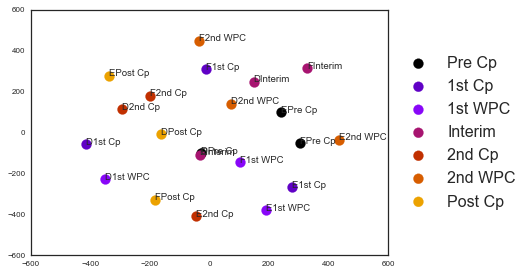

In [95]:
plt.figure()
it_s=0
cmap=plt.get_cmap('gnuplot')
x=np.linspace(0,1,8)
colors_plot_states={states[i]:cmap(x[i]) for i in range(7)}
for st in states:
    print(st)
    it_s+=1
    ind_s=list(np.where([d[1:]==st for d in Distances.index])[0])
    plt.scatter(Y_tsne.iloc[ind_s,0], Y_tsne.iloc[ind_s,1],color=colors_plot_states[st],label=st,s=100)
for label, x, y in zip(Distances.index, Y_tsne.iloc[:,0], Y_tsne.iloc[:,1]):
                print label,x,y
                plt.annotate(label,xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=16)            
plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plot/tsne_state_microbiome_hamming2.pdf',bbox_inches='tight')

            

E
F
D
DPre Cp -29.3215378661 -102.827131878
D1st Cp -413.77287939 -58.6990255098
D1st WPC -352.030978269 -227.75795234
DInterim 148.546333501 246.890738863
D2nd Cp -292.503862888 112.797107942
D2nd WPC 73.7432428143 140.650764992
DPost Cp -163.157551245 -8.98683432291
EPre Cp 239.744371171 99.5276381047
E1st Cp 276.976957908 -267.108945657
E1st WPC 189.187472525 -381.249210695
EInterim -33.1638520497 -109.678613326
E2nd Cp -45.8922906437 -409.538058074
E2nd WPC 433.971967923 -35.7330918879
EPost Cp -337.422513244 277.444983544
FPre Cp 304.337734239 -53.9930659503
F1st Cp -13.2883057892 309.306257637
F1st WPC 103.595683207 -144.586511735
FInterim 329.19500071 314.749004013
F2nd Cp -200.459414566 180.173560422
F2nd WPC -33.6877326983 448.31633522
FPost Cp -184.597845351 -329.697949363


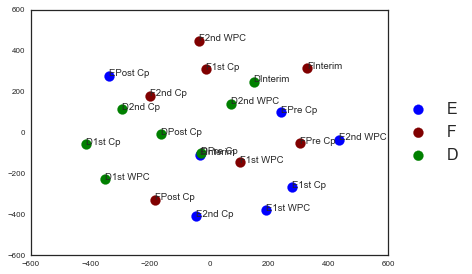

In [83]:
plt.figure()
it_s=0
cmap=plt.get_cmap('gnuplot')
x=np.linspace(0,1,8)
colors_plot_people={'E':'blue','F':'maroon','D':'green'}
for p in ['E','F','D']:
    print(p)
    it_s+=1
    if p=='E':
        ind_p=list([np.where(e==Distances.index)[0][0] for e in index_e])
    elif p=='F':
        ind_p=list([np.where(e==Distances.index)[0][0] for e in index_f])
    else:
        ind_p=list([np.where(e==Distances.index)[0][0] for e in index_d])
    plt.scatter(Y_tsne.iloc[ind_p,0], Y_tsne.iloc[ind_p,1],color=colors_plot_people[p],label=p,s=100)
for label, x, y in zip(Distances.index, Y_tsne.iloc[:,0], Y_tsne.iloc[:,1]):
                print label,x,y
                plt.annotate(label,xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=16)
plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plot/tsne_people_microbiome_hamming.pdf',bbox_inches='tight')



In [24]:
Y_tsne[np.array(index_e),:][:,0]

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
#model = TSNE(n_components=2, random_state=0,metric='precomputed')
model=MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=1, random_state=None, dissimilarity='precomputed')
np.set_printoptions(suppress=True)

#chi_new=pca.fit_transform(chi[k])
chi_new=model.fit_transform(D) 
colors=[]
for e in sample_names:
    if e[0]=="E":
        colors.append("royalblue")
    elif e[0]=="D":
        colors.append("palevioletred")
    elif e[0]=="F":
        colors.append("darkturquoise")
        

plot=True
savefig=True
annotate=[True,"color"]
colors_state={e:colors_evol_E[e] for e in colors_evol_E.keys()}
colors_state.update(colors_evol_D)
colors_state.update(colors_evol_F)
if plot==True:
    fig,ax=plt.subplots(figsize=(10,12))
    sb.set_style("white")
    sb.set(style='ticks')
    sb.set_style({"xtick.direction":"in", "ytick.direction":"in"})
    sb.set_context("paper", font_scale=1.0)
    cmap = plt.get_cmap('hot')
    plt.scatter(chi_new[:,0],chi_new[:,1],cmap=cmap,s=300,c=[colors_state[e] for e in D.index])
    for label, x, y in zip(sample_names, chi_new[:, 0], chi_new[:, 1]):
                #print label,x,y
                plt.annotate(label,xy=(x, y), xytext=(-1, 0), textcoords='offset points')
    
    #plt.title("PCA projection of the wavelet distribution")
    plt.tight_layout()
    plt.savefig("plots_microbiome_analysis/MDS_ABT_colored_state.pdf")


1st Cp
1st WPC
2nd Cp
2nd WPC
Interim
Post Cp
Pre Cp
E37 0.0 0.0
E36 0.0 0.0
E35 0.0 0.0
F23 0.0 0.0
F22 0.0 0.0
F21 0.0 0.0
F20 0.0 0.0
F27 0.0 0.0
F26 0.0 0.0
F25 0.0 0.0
F24 0.0 0.0
D50 0.0 0.0
D51 0.0 0.0
F29 0.0 0.0
D53 0.0 0.0
D54 0.0 0.0
D55 0.0 0.0
D56 0.0 0.0
E32 0.0 0.0
E31 0.0 0.0
E30 0.0 0.0
F30 0.0 0.0
F31 0.0 0.0
F32 0.0 0.0
F33 0.0 0.0
F34 0.0 0.0
F35 0.0 0.0
F36 0.0 0.0
F37 0.0 0.0
F38 0.0 0.0
F39 0.0 0.0
E15 0.0 0.0
D29 0.0 0.0
F41 0.0 0.0
E51 0.0 0.0
D52 0.0 0.0
E52 0.0 0.0
F28 0.0 0.0
E25 0.0 0.0
F40 0.0 0.0
E9 0.0 0.0
E8 0.0 0.0
E5 0.0 0.0
E4 0.0 0.0
E7 0.0 0.0
E6 0.0 0.0
E1 0.0 0.0
E3 0.0 0.0
E2 0.0 0.0
E42 0.0 0.0
E43 0.0 0.0
E40 0.0 0.0
E41 0.0 0.0
E46 0.0 0.0
E47 0.0 0.0
E44 0.0 0.0
E45 0.0 0.0
E48 0.0 0.0
E49 0.0 0.0
F18 0.0 0.0
F19 0.0 0.0
F12 0.0 0.0
F13 0.0 0.0
F10 0.0 0.0
F11 0.0 0.0
F16 0.0 0.0
F17 0.0 0.0
F14 0.0 0.0
F15 0.0 0.0
D14 0.0 0.0
D15 0.0 0.0
D16 0.0 0.0
E34 0.0 0.0
D10 0.0 0.0
D11 0.0 0.0
D12 0.0 0.0
D13 0.0 0.0
D18 0.0 0.0
D19 0.0 0.0
E39 0.0 

KeyboardInterrupt: 

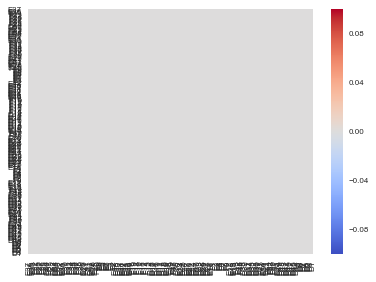

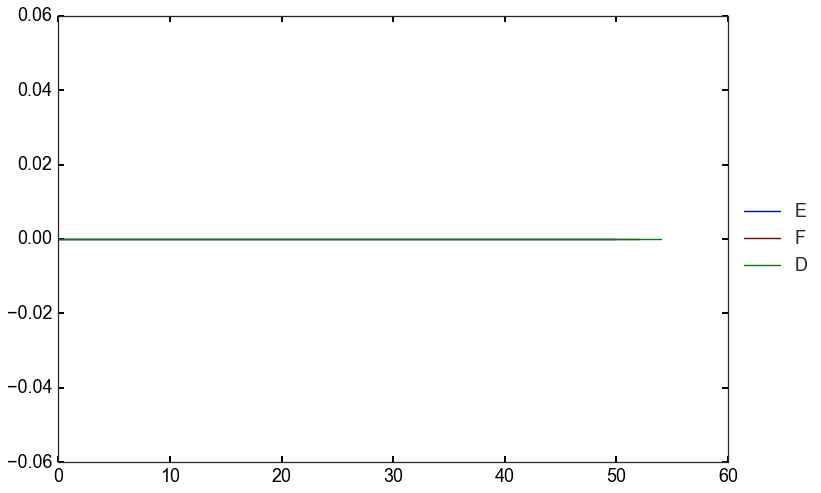

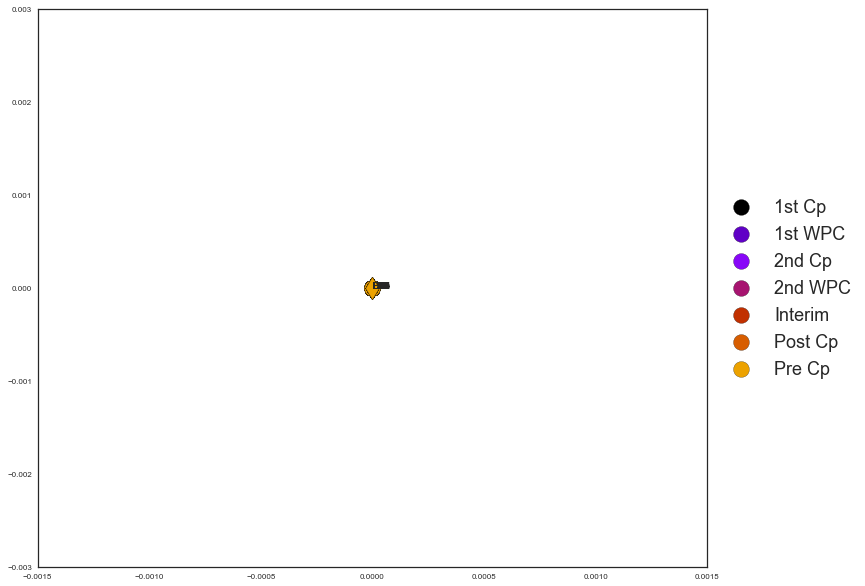

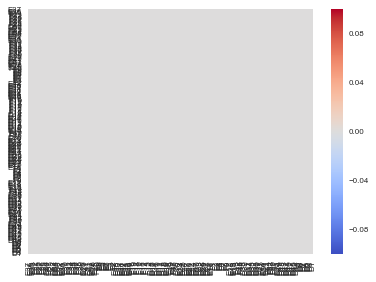

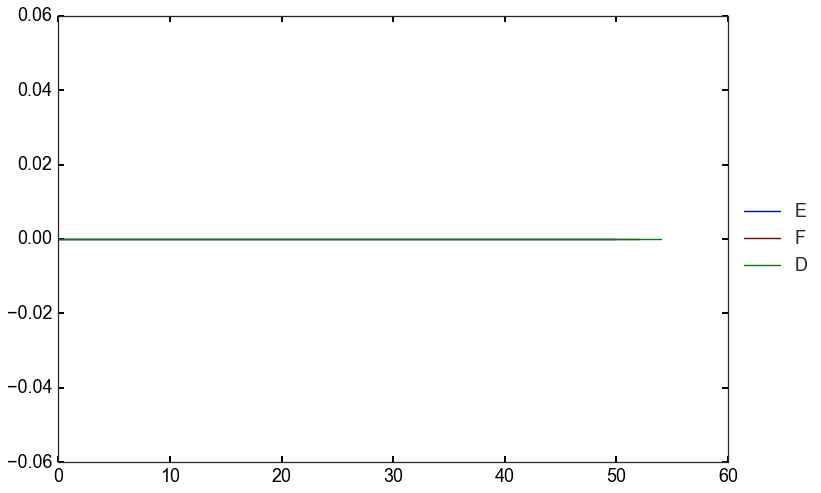

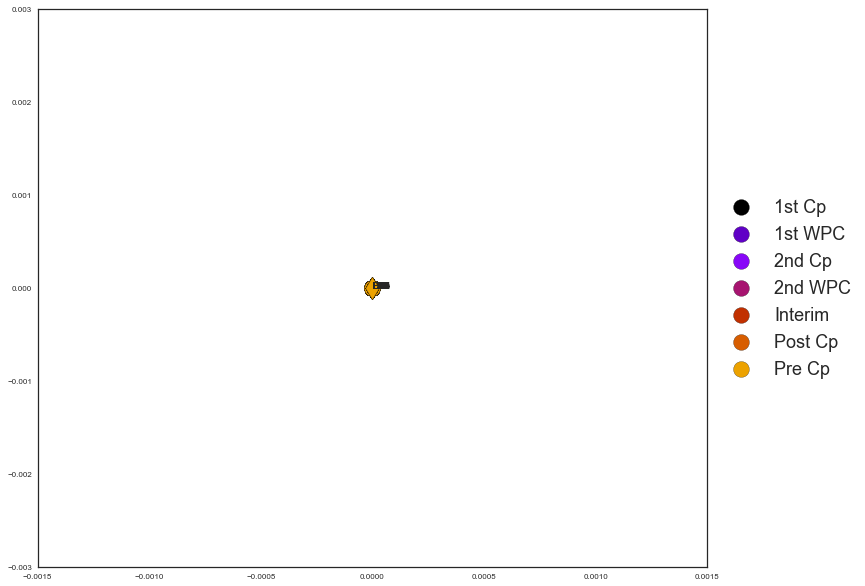

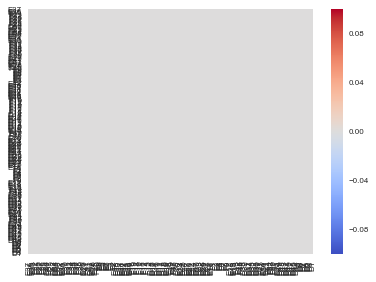

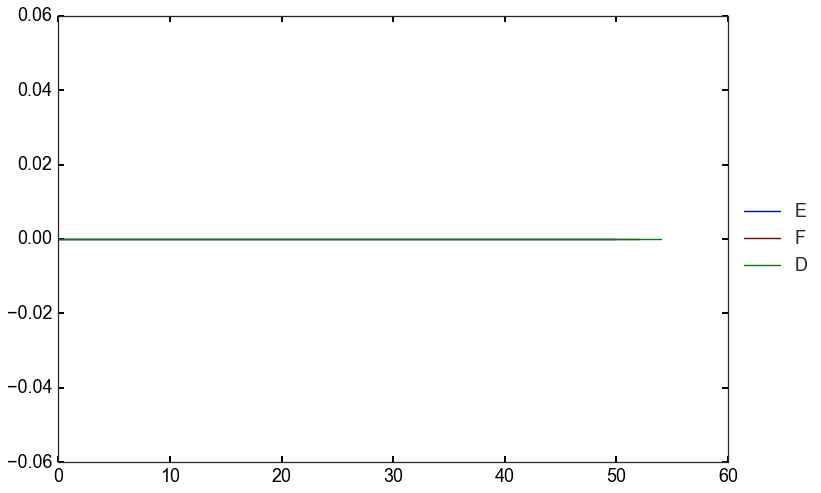

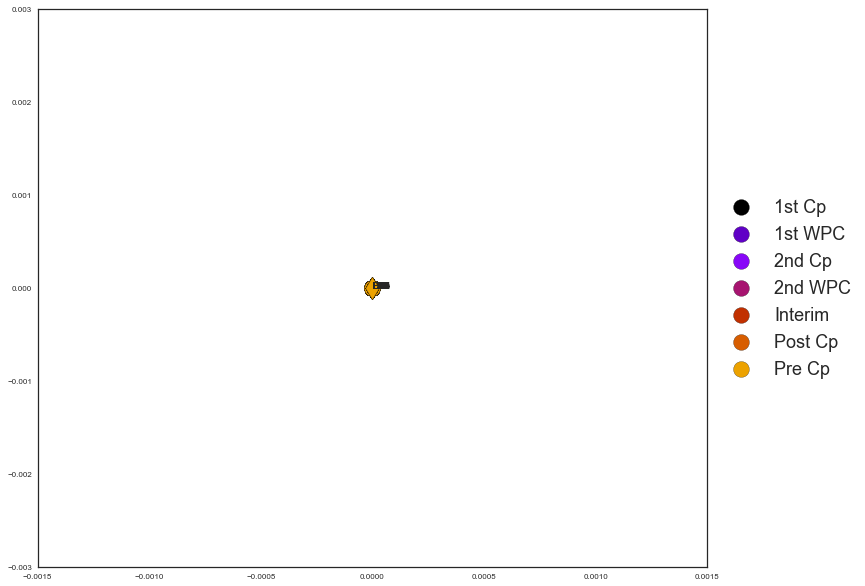

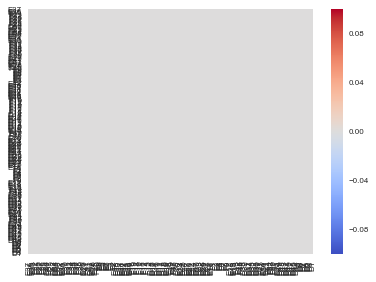

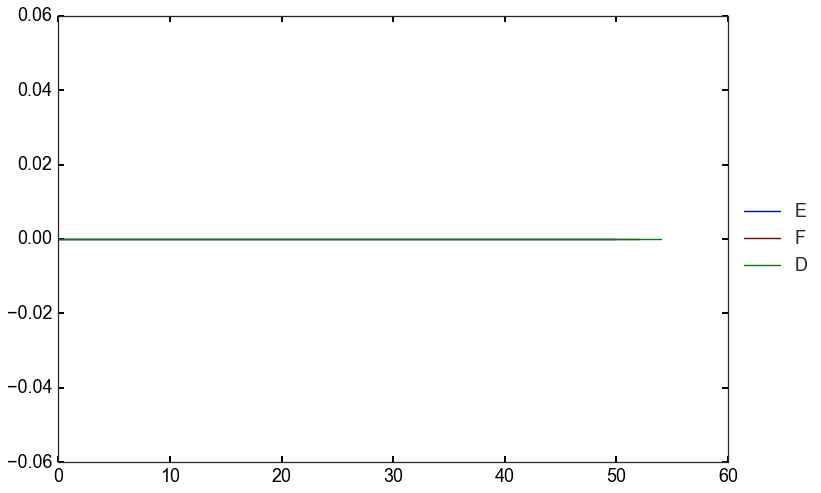

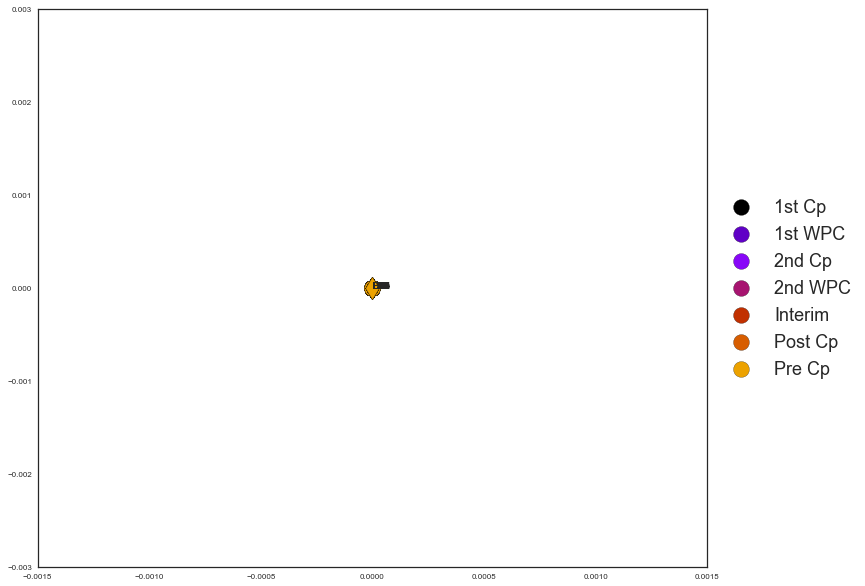

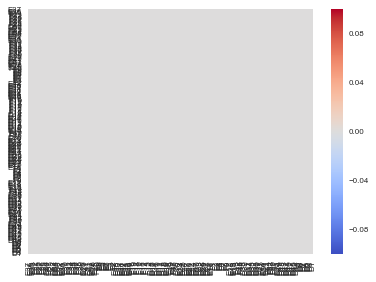

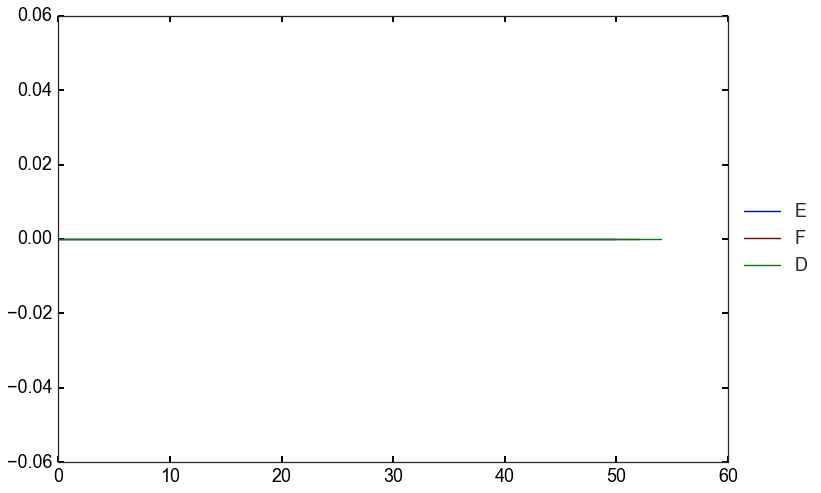

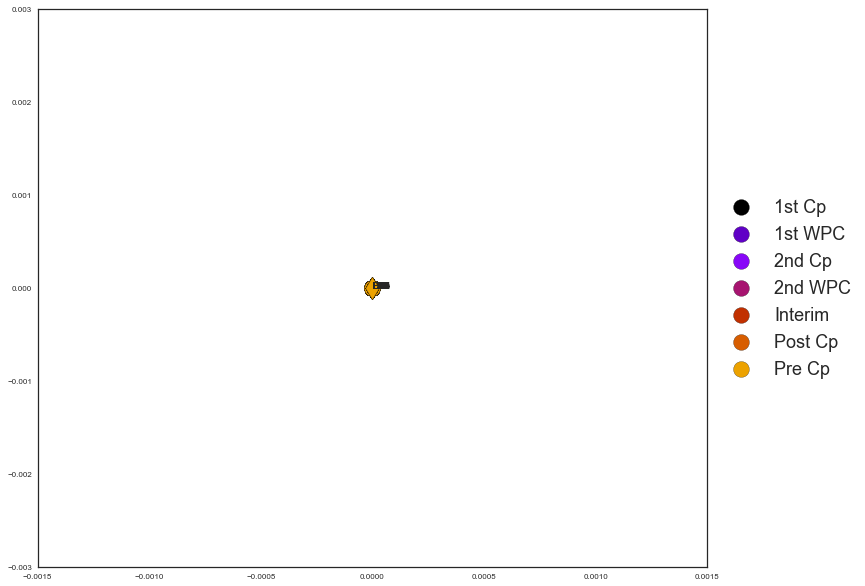

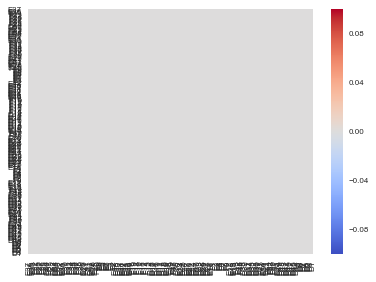

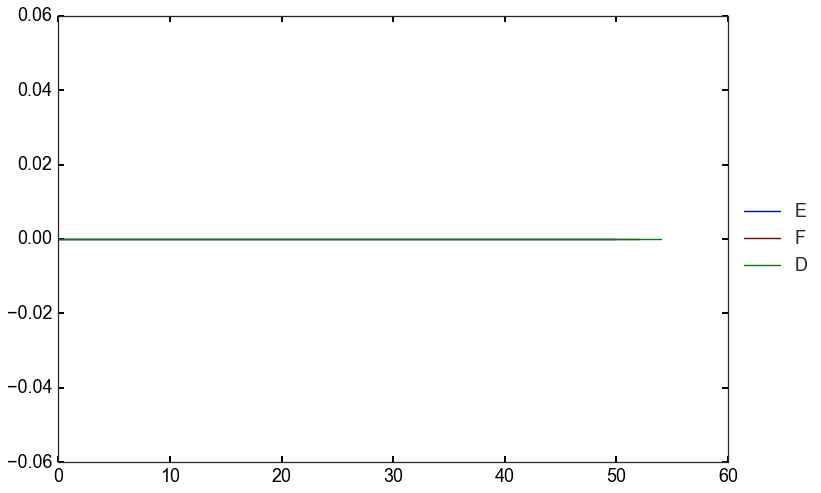

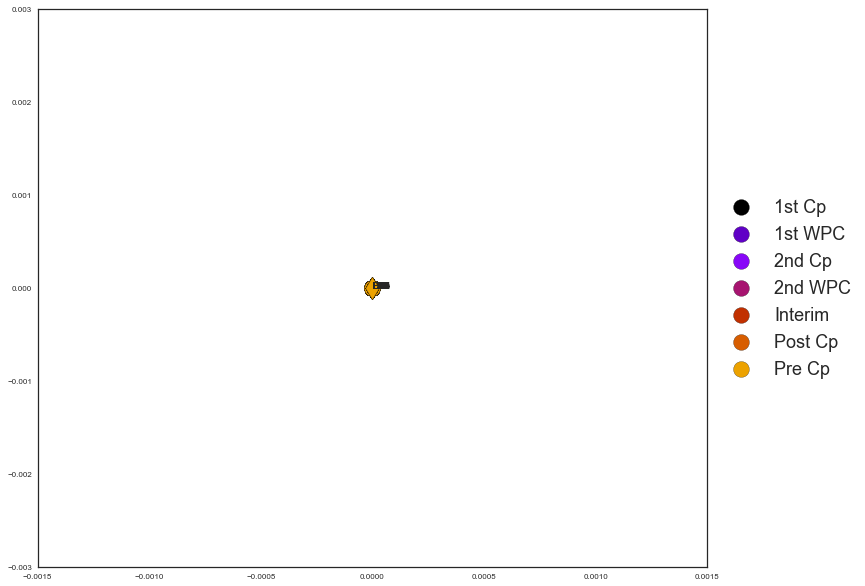

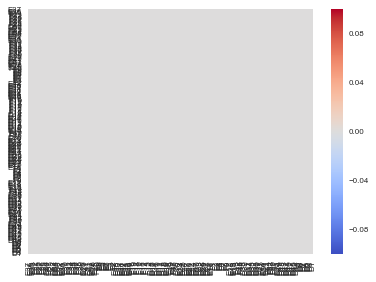

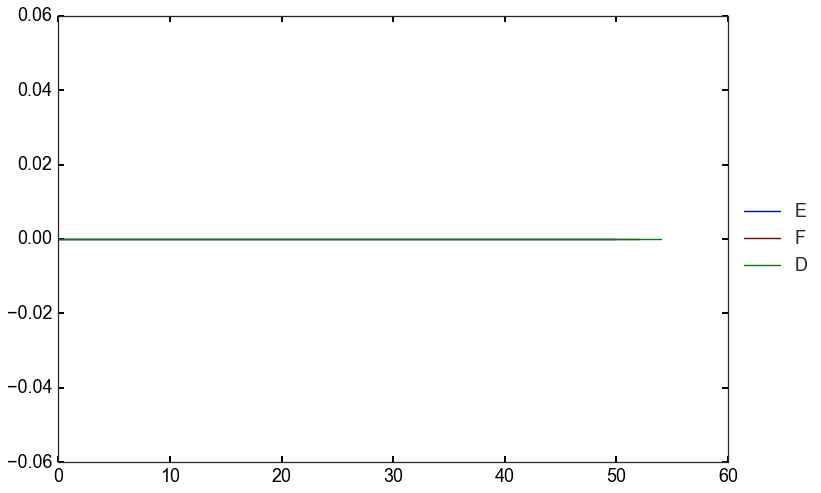

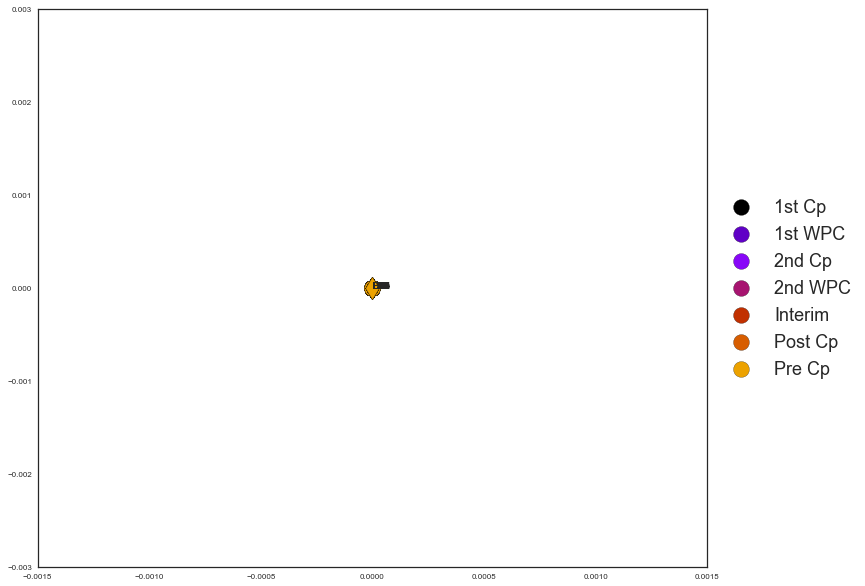

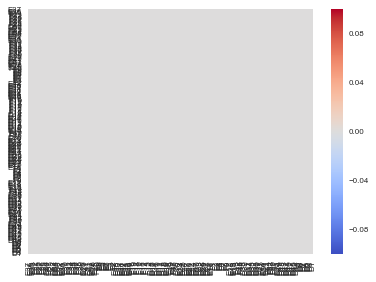

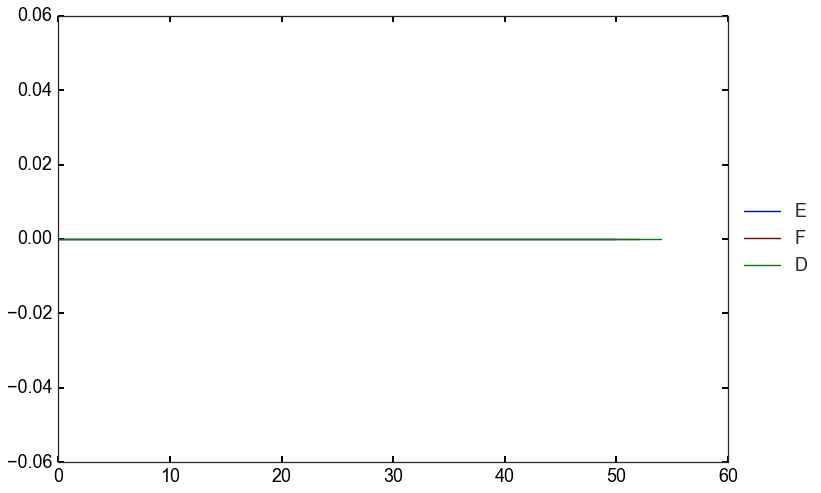

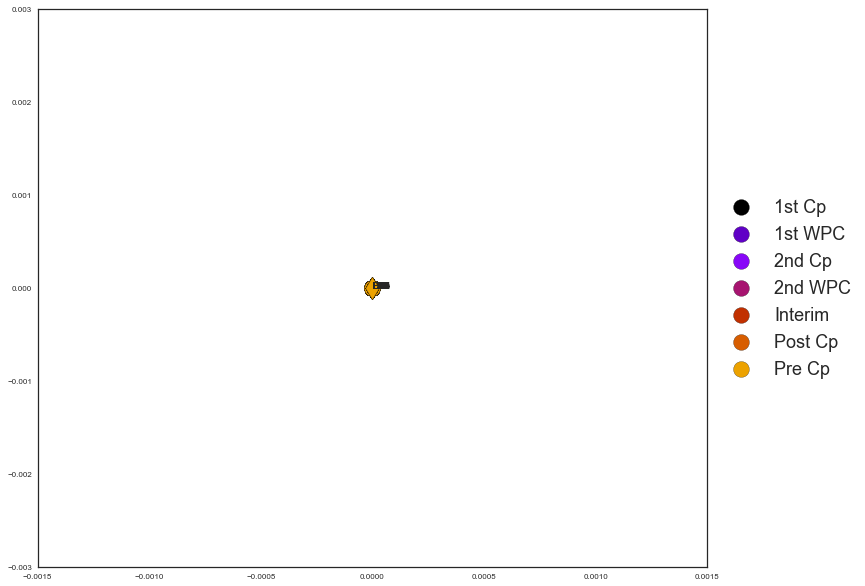

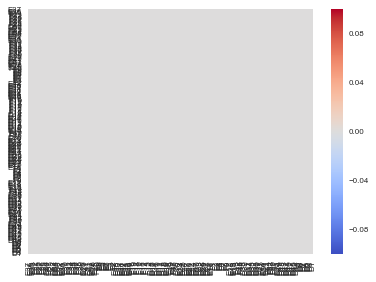

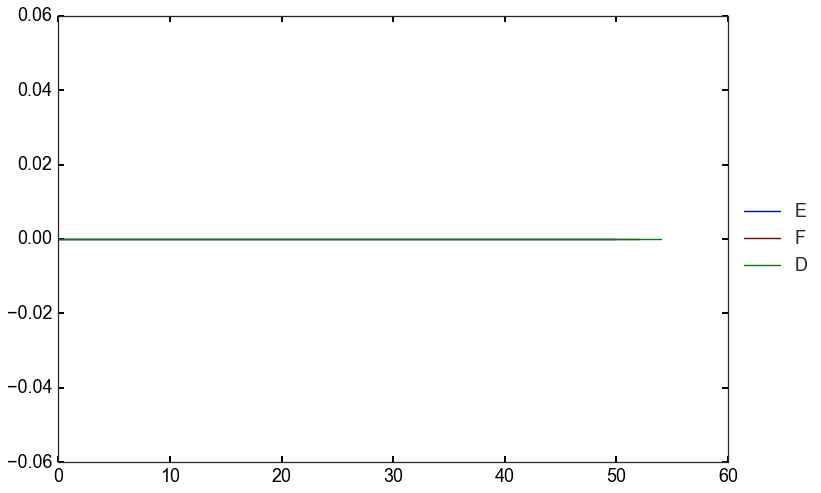

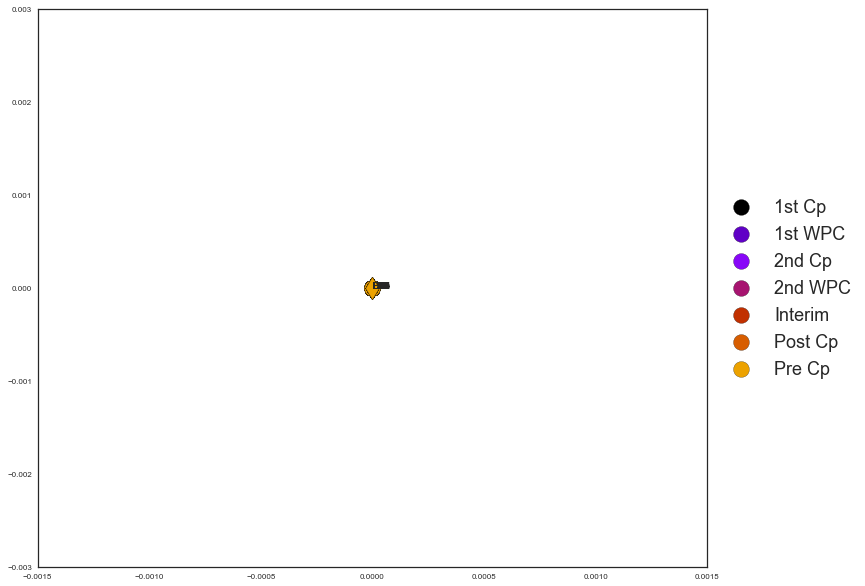

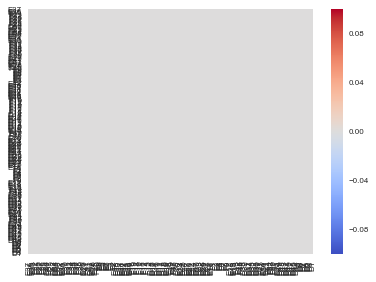

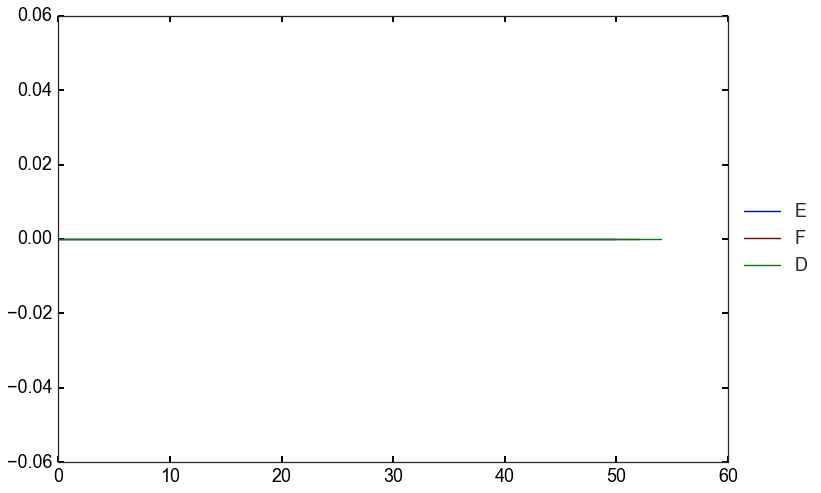

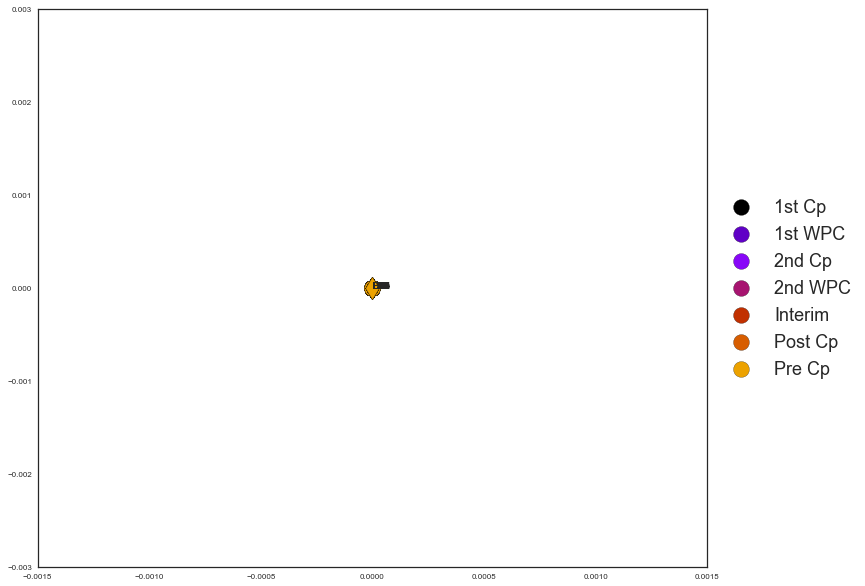

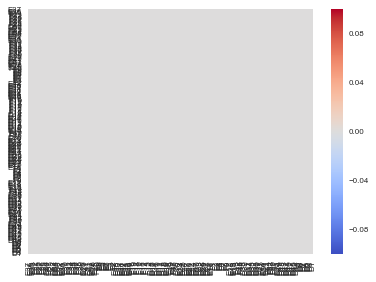

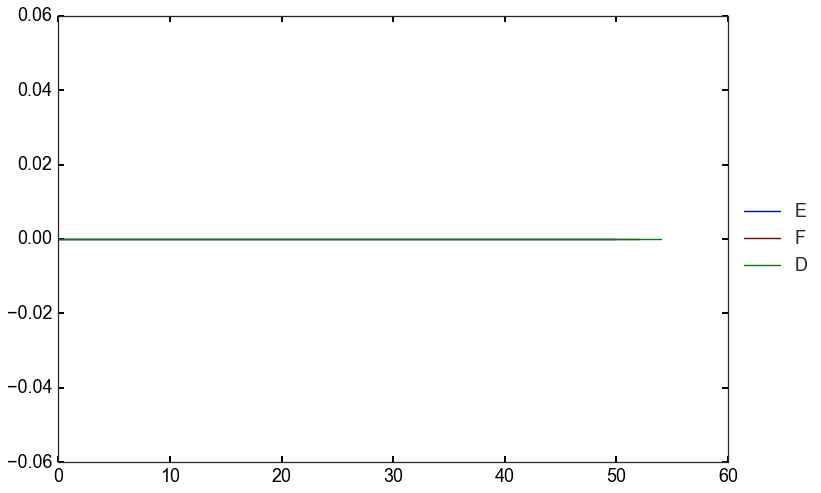

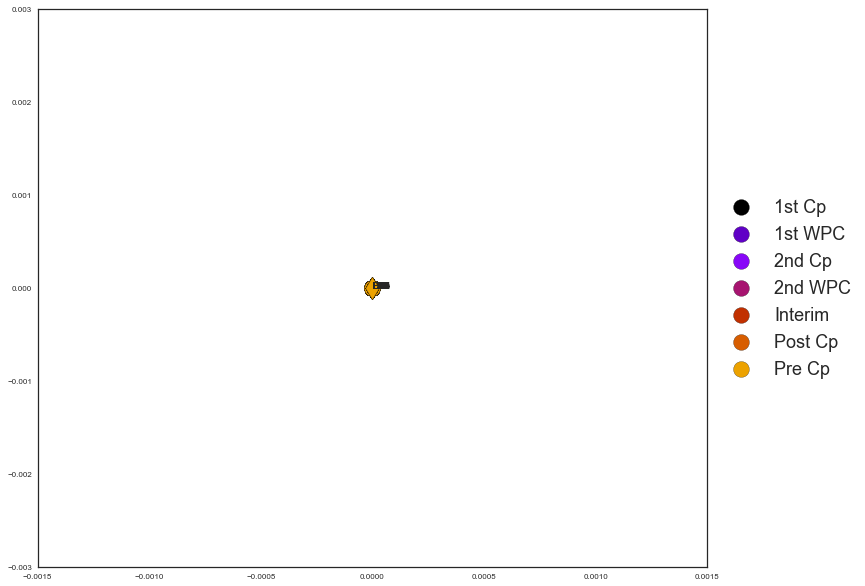

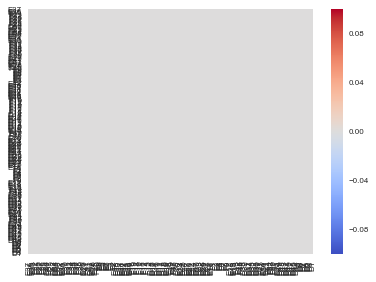

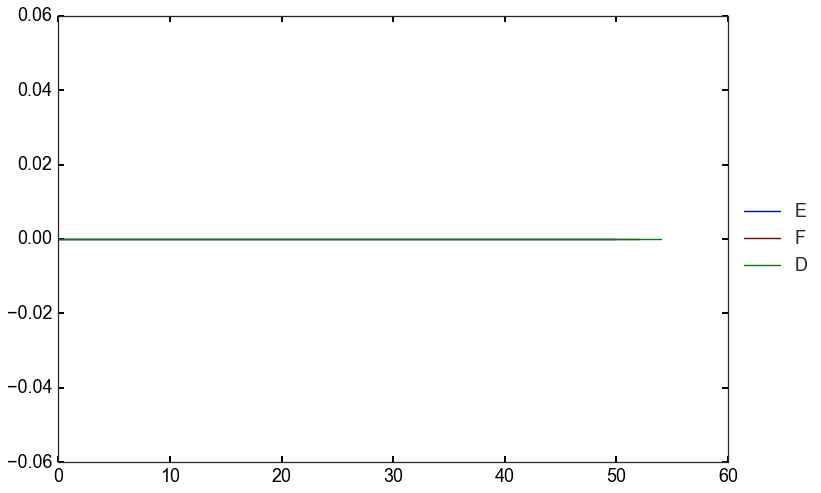

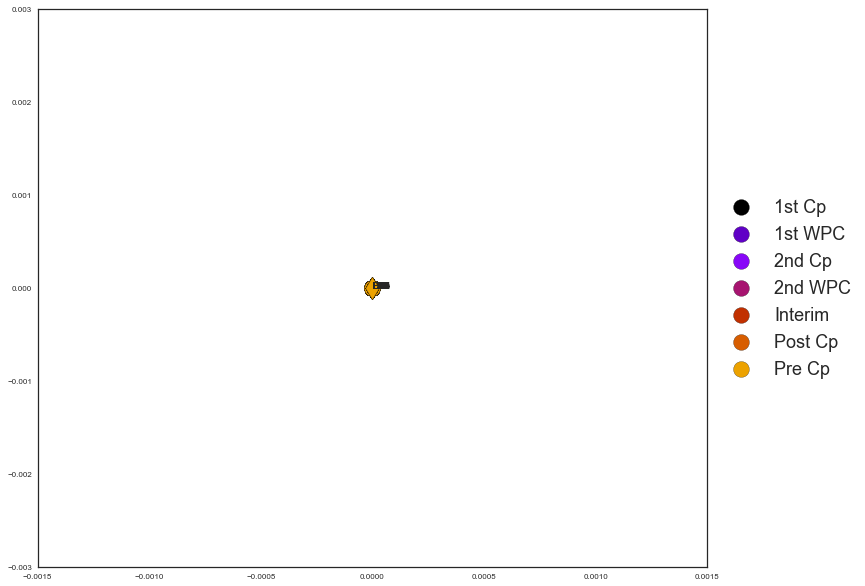

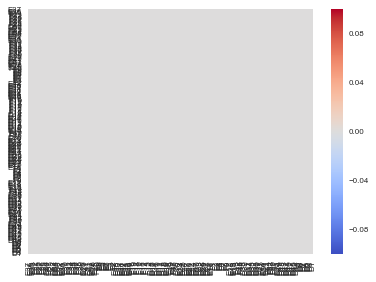

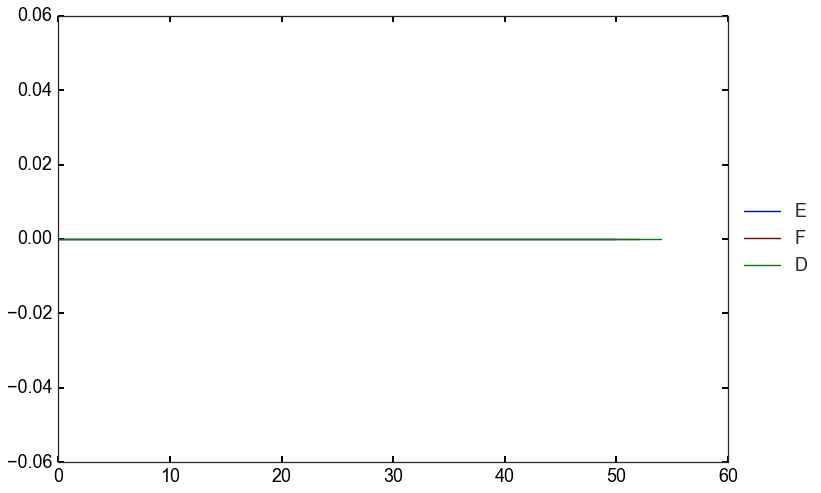

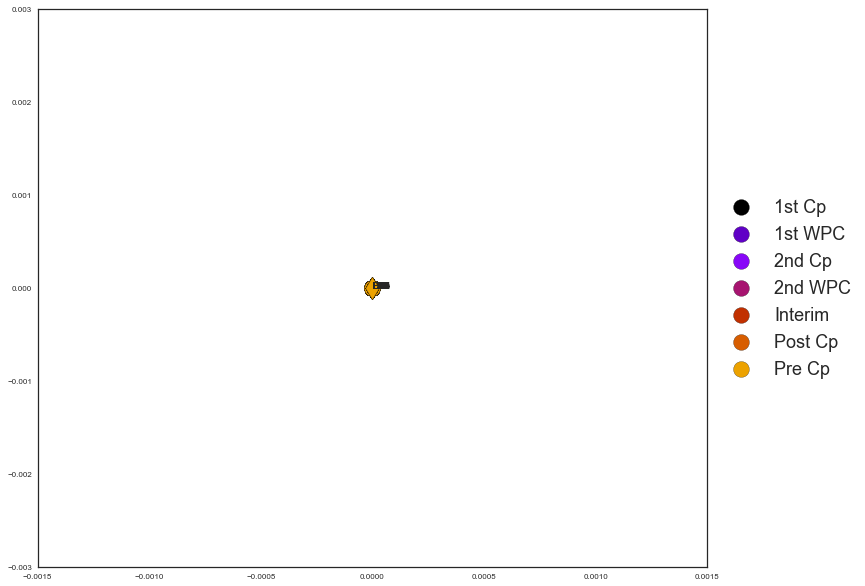

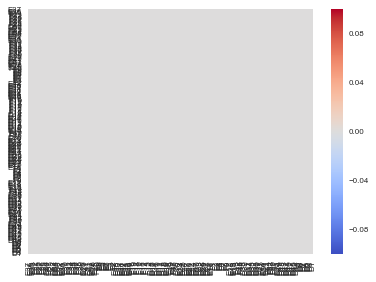

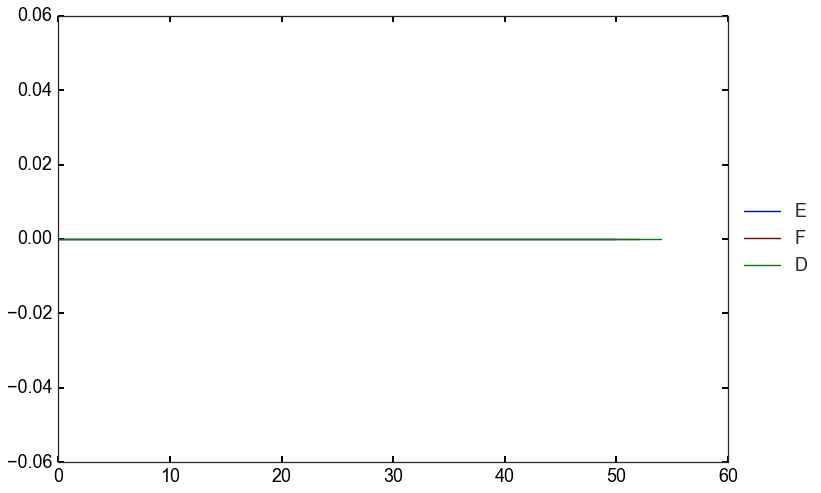

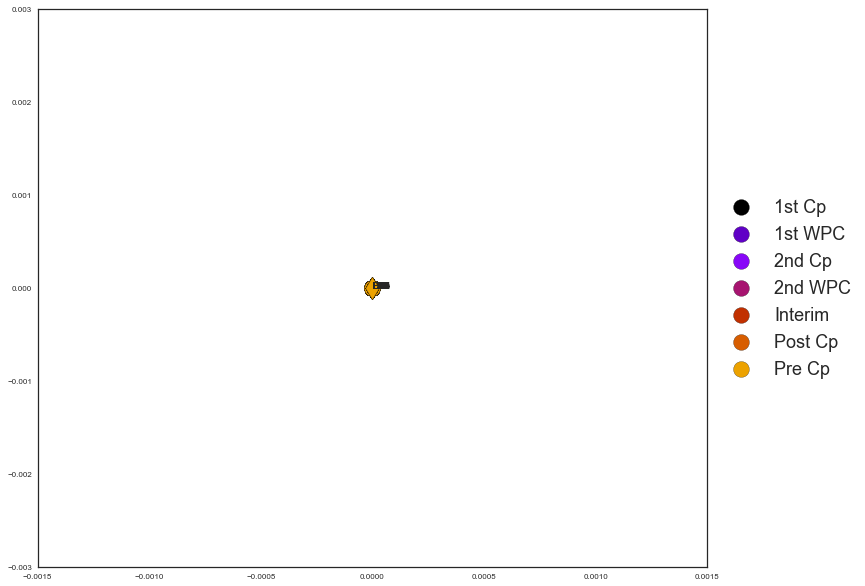

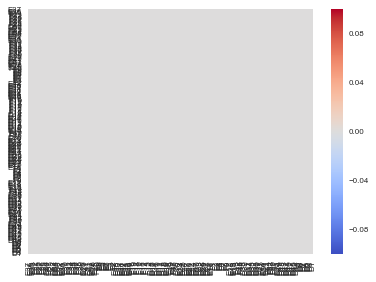

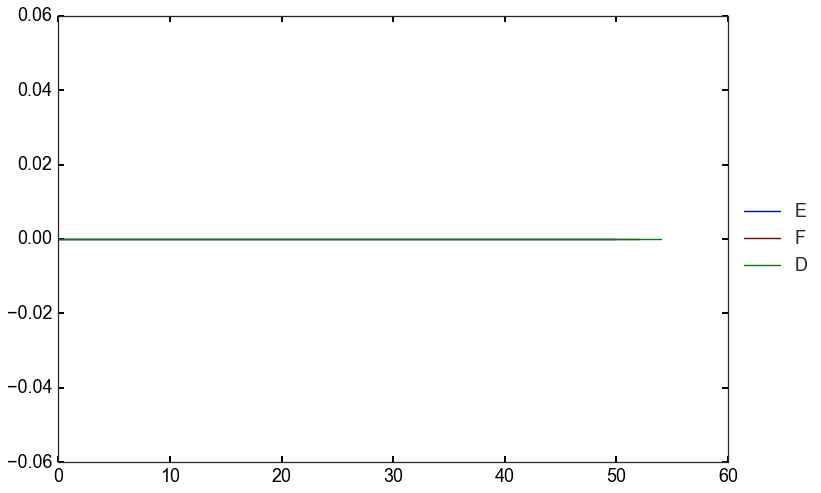

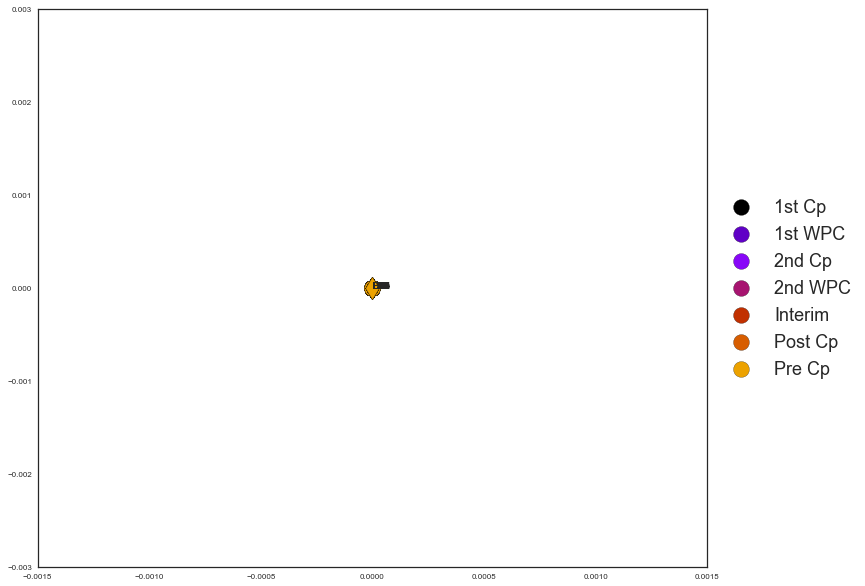

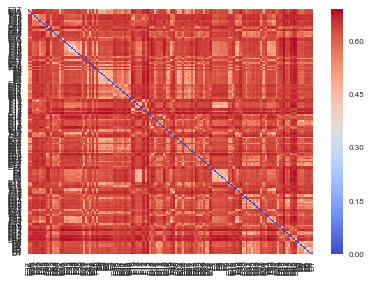

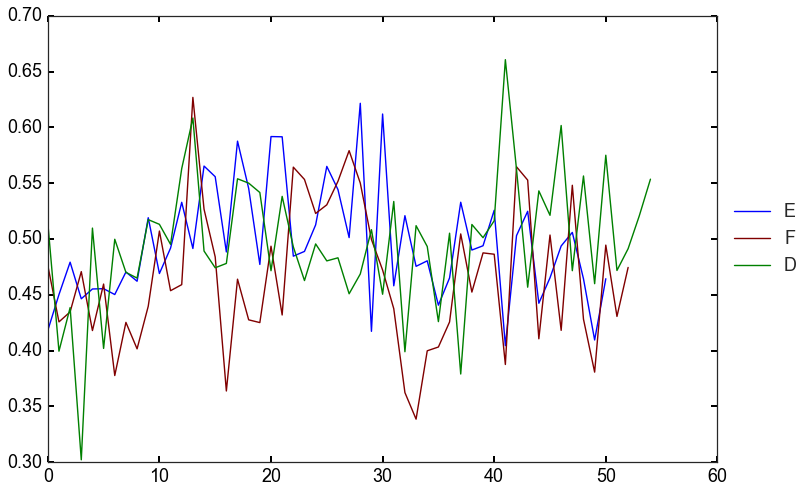

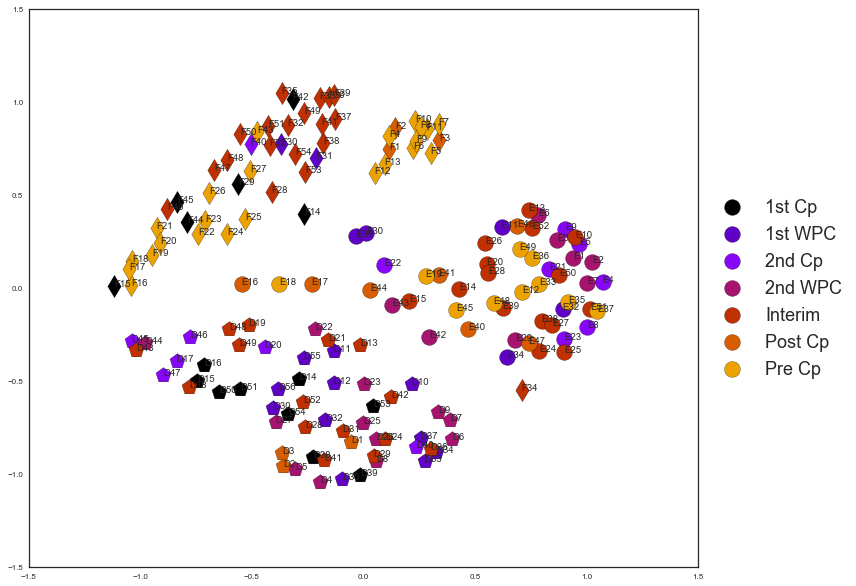

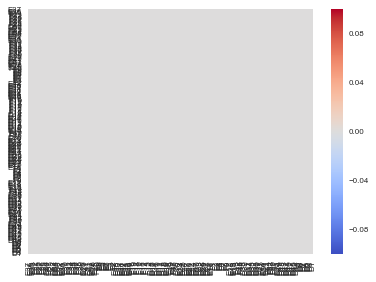

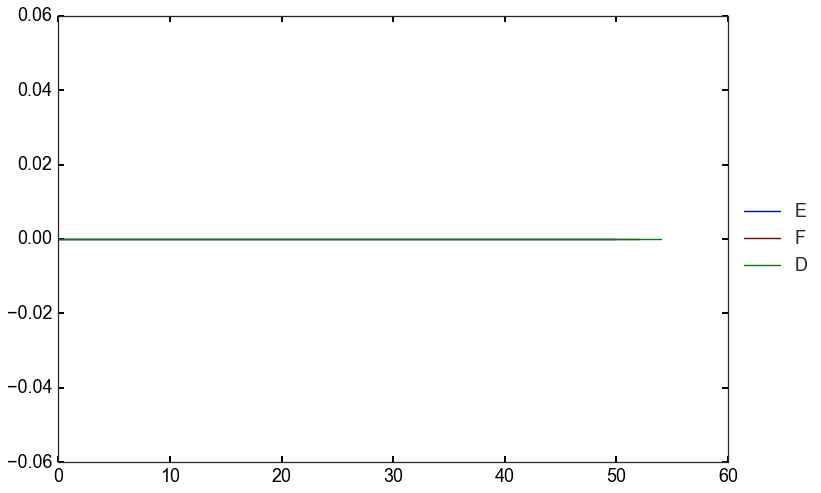

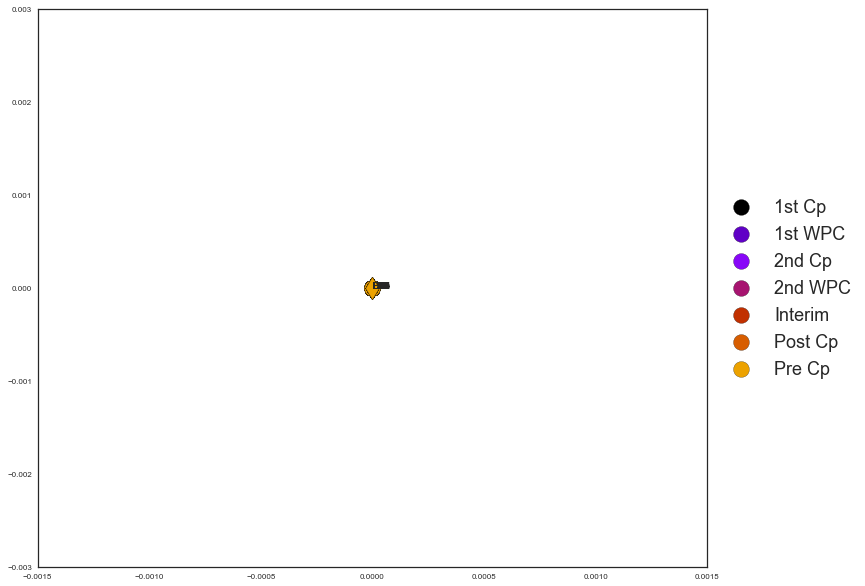

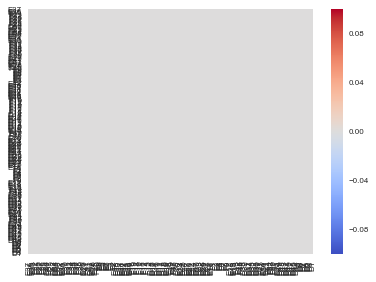

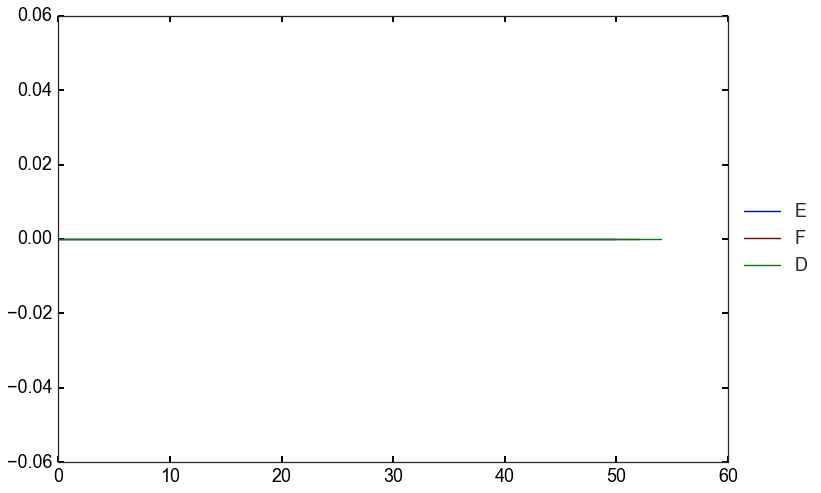

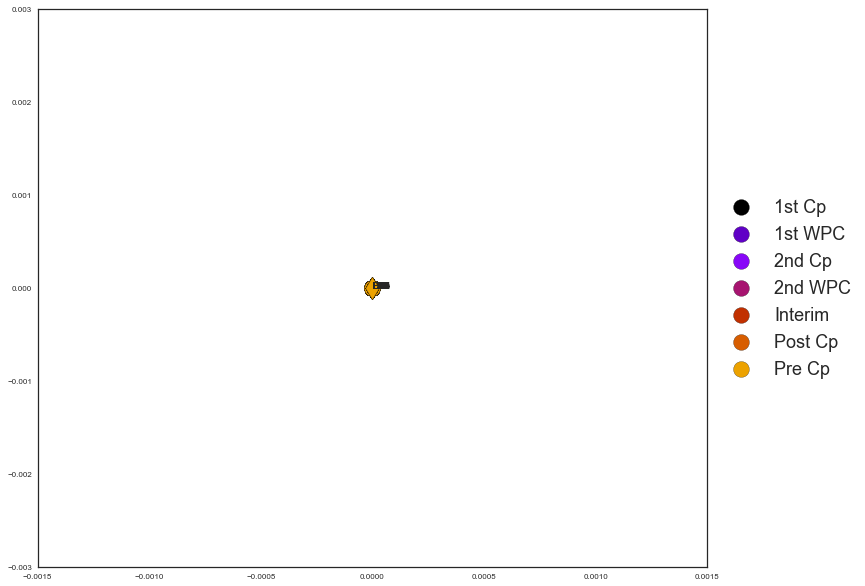

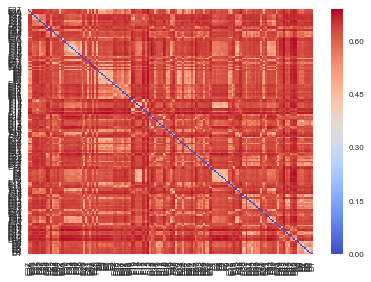

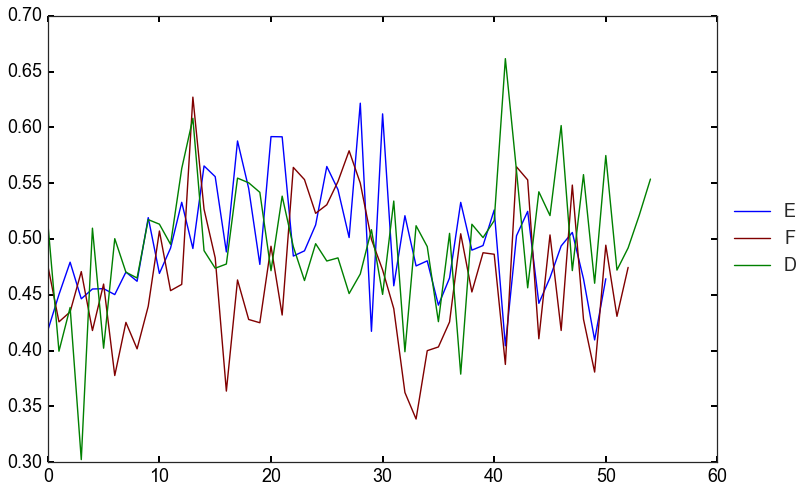

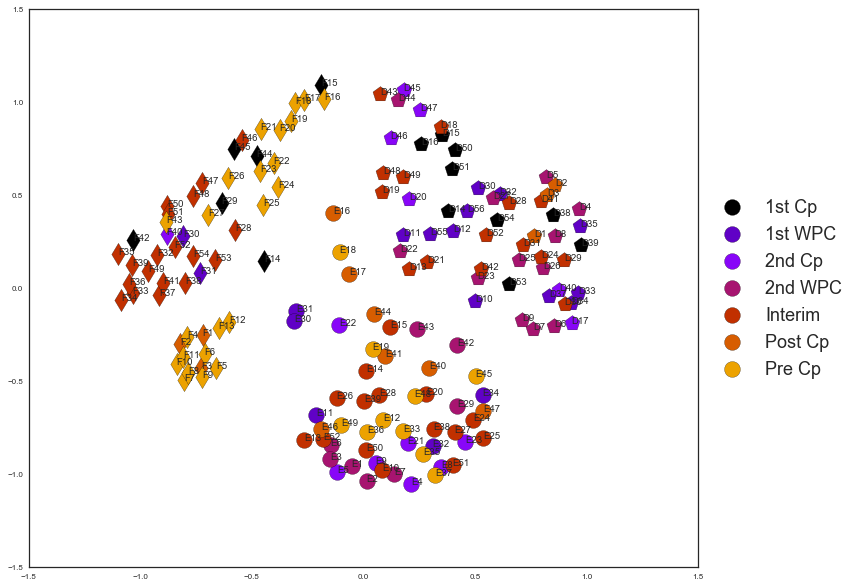

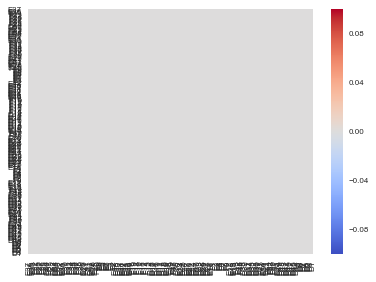

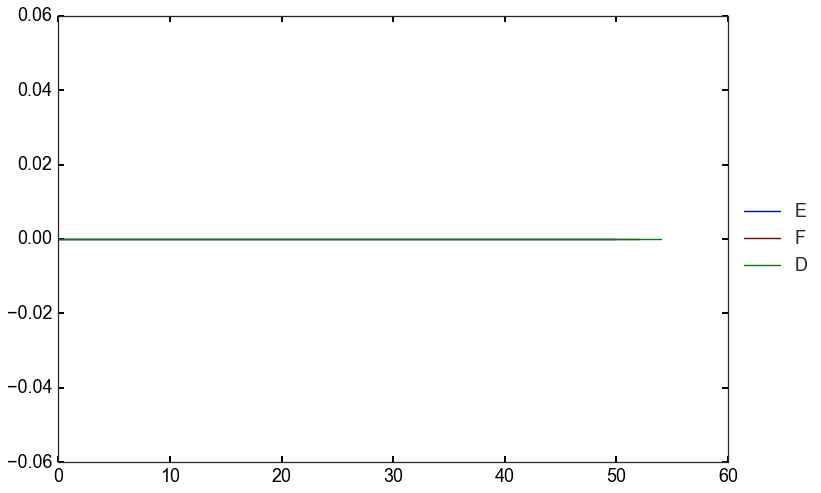

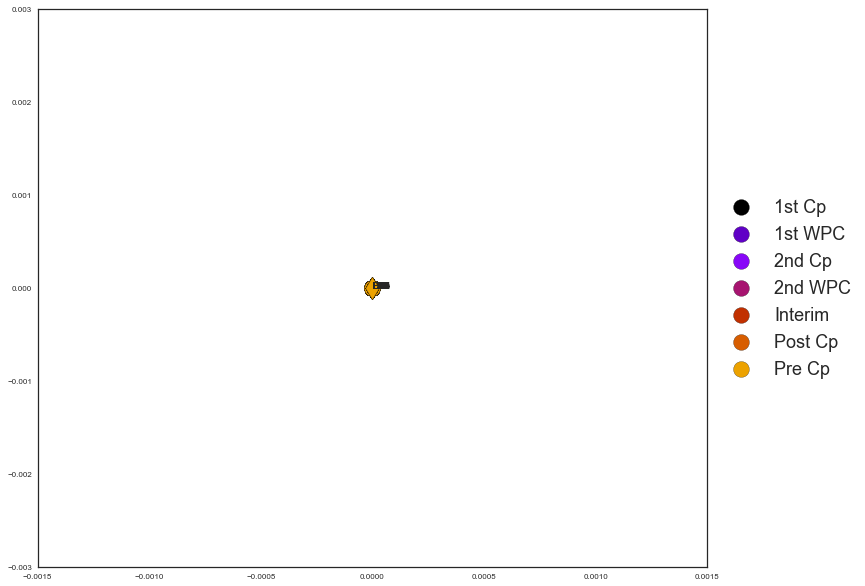

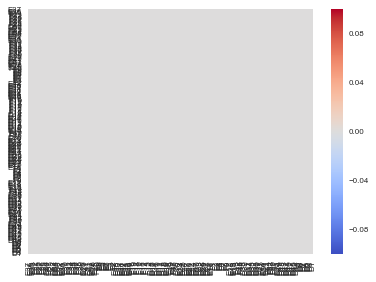

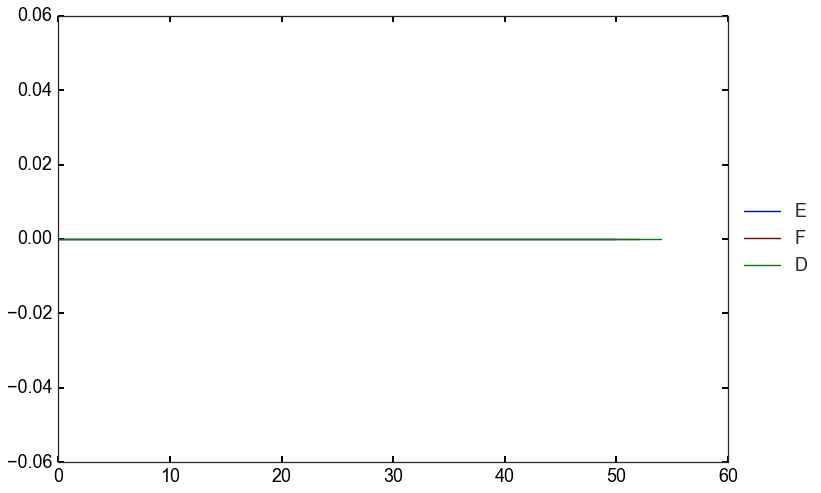

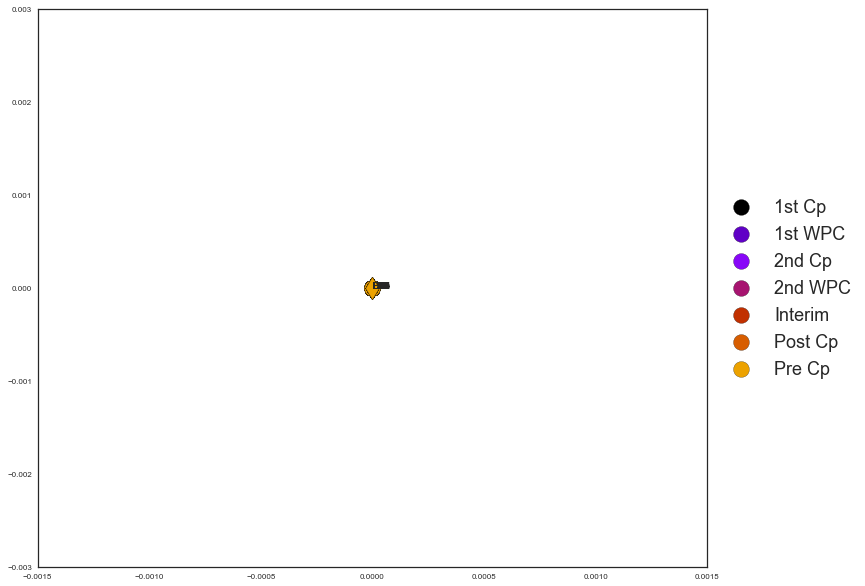

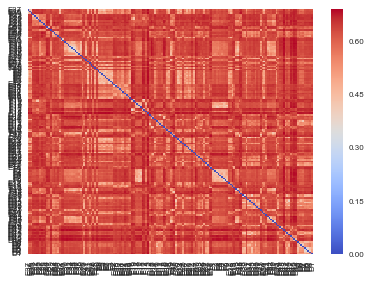

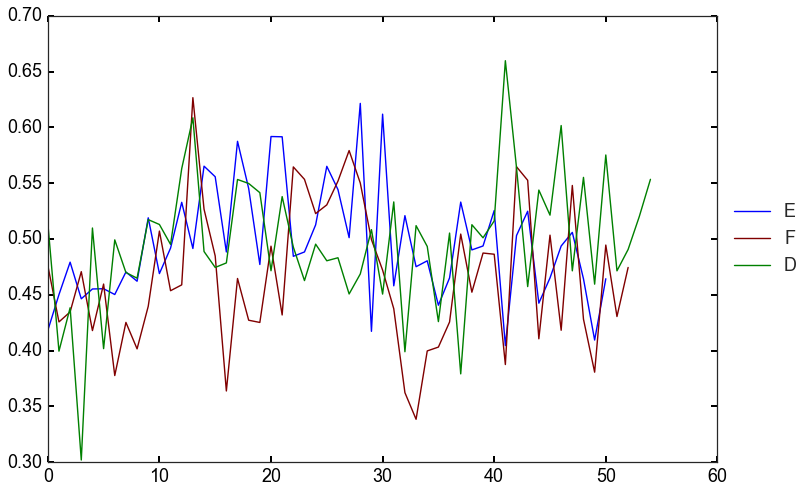

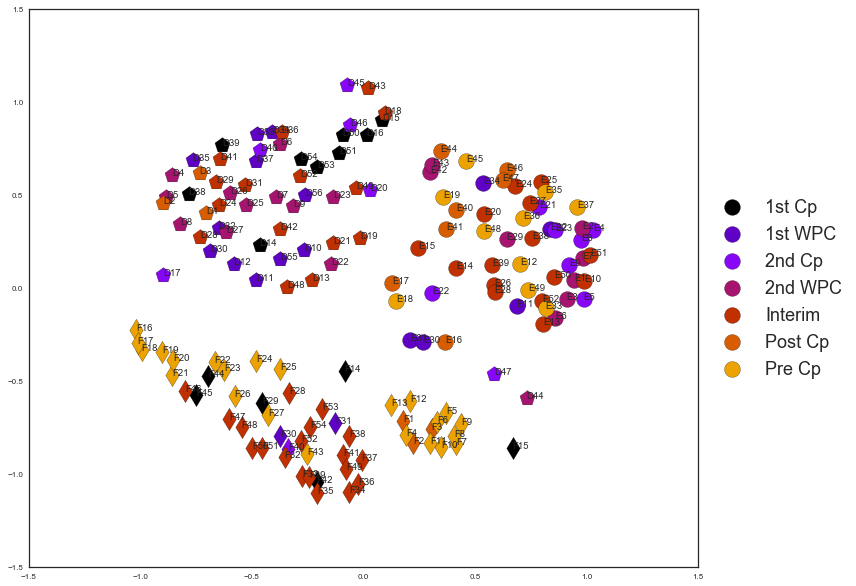

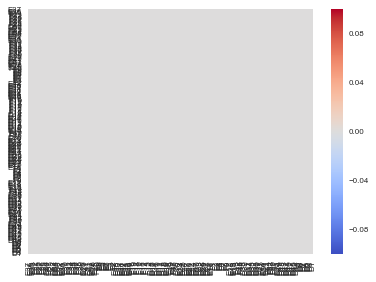

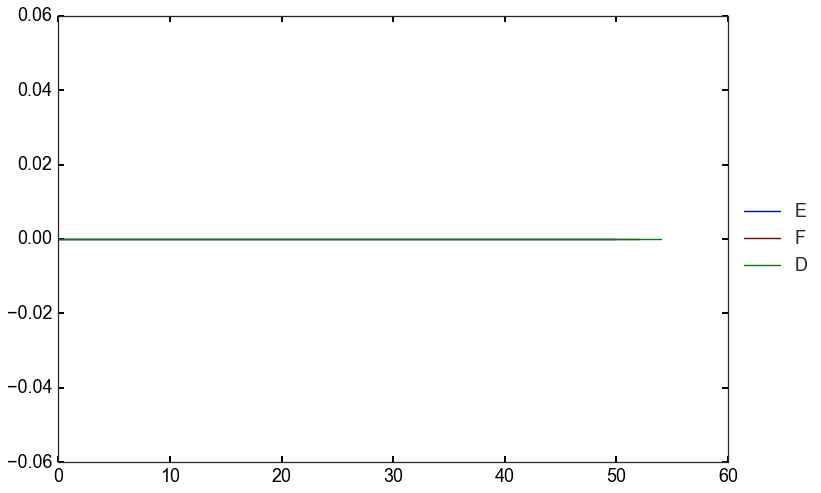

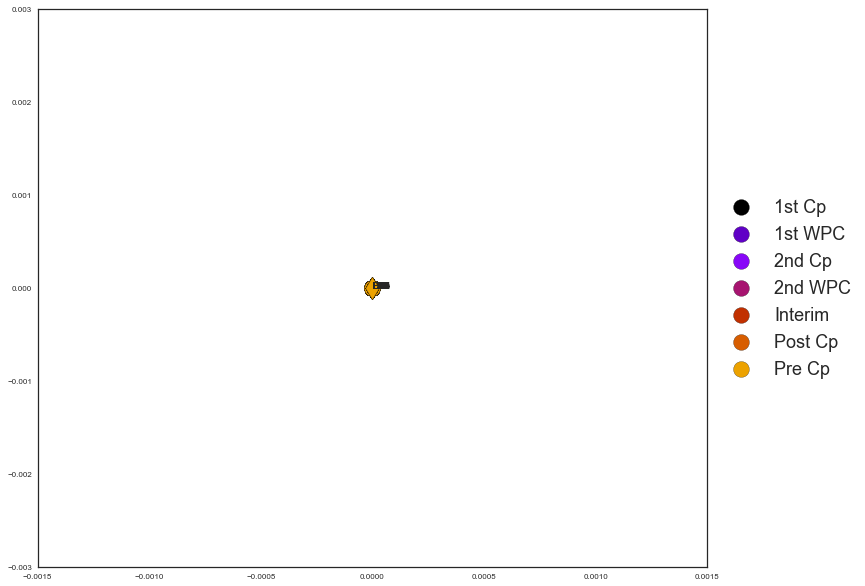

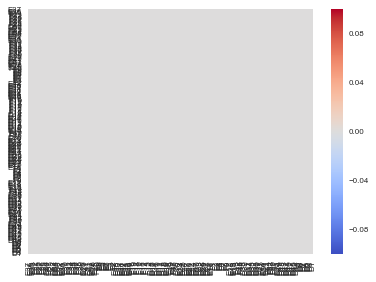

In [77]:
####
for k in D2.keys()[1:]:
    alg='heat_'+str(k)
    #Distances=pd.DataFrame.from_csv('/Users/cdonnat/Dropbox/Distances/distances/'+alg+'_microbiome.csv',header=0,index_col=0)
    #Y_tsne=pd.DataFrame.from_csv('/Users/cdonnat/Dropbox/Distances/distances/'+alg+'_microbiome_tsne.csv',header=0,index_col=0)

    Distances=D2[k]
    plt.figure()
    sb.heatmap(Distances,cmap='coolwarm')
    plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plot/heatmap_'+alg+'_microbiome_sample.pdf',bbox_inches='tight')



    

    fig,ax=plt.subplots(figsize=(12,8))
    #sb.set_context('paper')
    plt.plot([Distances.loc[index_e[i],index_e[i+1]] for i in range(len(index_e)-1)],color='blue',label='E')
    plt.plot([Distances.loc[index_f[i],index_f[i+1]] for i in range(len(index_f)-1)],color='maroon',label='F')
    plt.plot([Distances.loc[index_d[i],index_d[i+1]] for i in range(len(index_d)-1)],color='green',label='D')
    #ax.set_xticklabels([index_e[i][1:]+'/ \n'+index_e[i+1][1:] for i in range(len(index_e)-1)])
    ax.tick_params(axis='x',labelsize=18, direction='in', length=6, width=2, colors='black')
    ax.tick_params(axis='y',labelsize=18, direction='in', length=6, width=2, colors='black')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=18)
    plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plot/consecutive_dist_microbiome_'+alg+'_sample.pdf',bbox_inches='tight')
    #ax.xaxis.set_major_formatter(AutoLocator())


    
    fig,ax=plt.subplots(figsize=(12,10))
    it_s=0
    shape_people={'E':'o','F':'d','D':'p'}
    cmap=plt.get_cmap('gnuplot')
    x=np.linspace(0,1,8)
    mds=MDS(2,metric='precomputed')
    Y_tsne=mds.fit_transform(Distances)
    colors_plot_states={states[i]:cmap(x[i]) for i in range(7)}
    for st in states:
        print(st)
        it_s+=1
        ind_s=list(np.where([d==st for d in sample.condition.values])[0])
        for p in ['E','F','D']:
            if p=='E':
                ind_ss=np.intersect1d(ind_s,list(np.where([d[0]==p for d in Distances.index])[0]))
                plt.scatter(Y_tsne[ind_ss,0], Y_tsne[ind_ss,1],c=colors_plot_states[st],label=st,marker=shape_people[p], s=250)
            else:
                ind_ss=np.intersect1d(ind_s,list(np.where([d[0]==p for d in Distances.index])[0]))
                plt.scatter(Y_tsne[ind_ss,0], Y_tsne[ind_ss,1],c=colors_plot_states[st],marker=shape_people[p], s=250)



            #plt.scatter(Y_tsne[ind_s,0], Y_tsne[ind_s,1],color=colors_plot_states[st],label=st,marker=shape_people[p],linestyle='None', markersize=15)
    for label, x, y in zip(Distances.index, Y_tsne[:,0], Y_tsne[:,1]):
                print label,x,y
                plt.annotate(label,xy=(x, y), xytext=(0, 0),textcoords='offset points')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=18)            
    plt.savefig('/Users/cdonnat/Dropbox/Distances/write_up/plot/mds_state_microbiome_'+alg+'_sample.pdf',bbox_inches='tight')





In [78]:
D_

{0.5:           E37       E36       E35       F23       F22       F21       F20  \
 E37  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 E36  0.440653  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 E35  0.415345  0.480455  0.000000  0.000000  0.000000  0.000000  0.000000   
 F23  0.659195  0.644288  0.656118  0.000000  0.000000  0.000000  0.000000   
 F22  0.652764  0.652899  0.666265  0.431948  0.000000  0.000000  0.000000   
 F21  0.660613  0.651163  0.663752  0.503292  0.493589  0.000000  0.000000   
 F20  0.660006  0.654030  0.659759  0.508776  0.520412  0.425369  0.000000   
 F27  0.650100  0.649993  0.660775  0.576032  0.568370  0.574743  0.578556   
 F26  0.661569  0.660167  0.668060  0.574619  0.564919  0.582113  0.599449   
 F25  0.650892  0.651018  0.644082  0.569856  0.584658  0.550684  0.582385   
 F24  0.653079  0.646221  0.645308  0.564756  0.582557  0.579222  0.583341   
 D50  0.627659  0.638545  0.636682  0.655890  0.655039  0.6